In [435]:
31.25/4

7.8125

# Section 5.2

In [1]:
import numpy as np
from tabulate import tabulate
import os
from matplotlib import pyplot as plt

In [2]:
#data import
v_sample = 62.5 / 2
v_sig = np.arange(.1, 1.1, .1) * v_sample
v_read = np.array(
    [3.125, 6.25, 9.346, 12.5, 15.57, 18.86, 21.93, 25, 28.15, 31.25])
signal_error = np.array([0, 0, 0.05, 0.2, 0.03, 0.06, 0, 0, 0.07, 0])
period = np.array([320, 160, 106, 80, 64, 53.6, 45.6, 40, 35.4, 32])
period_error = np.array([0, 0, 1, 0, 0, 0.6, 0, 0, 0, 0])
voltage = np.array(
    [1.21, 1.29, 1.08, 0.0736, 0.09, 0.0436, 1.28, 1.31, 1.38, 1.5])
voltage_error = np.array([0.01, 0.01, 0.01, 0.01, 2, 2, 0, 0, 0.02, 0.01])

In [3]:
data = np.concatenate(
    (v_sig[np.newaxis], v_read[np.newaxis], signal_error[np.newaxis],
     period[np.newaxis], voltage[np.newaxis]))

In [4]:
print(
    tabulate(data.T,
             headers=('nu  (MHz)', 'nu (on oscil) (MHz)', 'Signal Error (MHz)',
                      'Period (ns)', 'Period Error (ns)',
                      'Voltage (peak to peak) (V)'),
             tablefmt='grid'))

+-------------+-----------------------+----------------------+---------------+---------------------+
|   nu  (MHz) |   nu (on oscil) (MHz) |   Signal Error (MHz) |   Period (ns) |   Period Error (ns) |
+=============+=======================+======================+===============+=====================+
|       3.125 |                 3.125 |                 0    |         320   |              1.21   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|       6.25  |                 6.25  |                 0    |         160   |              1.29   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|       9.375 |                 9.346 |                 0.05 |         106   |              1.08   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|      12.5   |                12.5   |                 0.2  |          80   |             

In [5]:
import glob

In [164]:
#Read in the files from the Lab_1_waveforms folder
samples = 300
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_waveforms/'
files = sorted(glob.glob(path + '*'))
data_5v = [np.load(file)['arr_0'][200:500] for file in files]

path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_waveforms_2/'
files = sorted(glob.glob(path + '*'))
data_2v = [np.load(file)['arr_0'][200:500] for file in files]

In [165]:
# normalize to propper voltages
voltage = np.array(
    [1.21, 1.29, 1.08, 0.0736, 0.09, 0.0436, 1.28, 1.31, 1.38, 1.5])
for i, volt in zip(np.arange(0, len(data_2v)), voltage):
    data_2v[i] = data_2v[i] / data_2v[i].max() * (volt / 2)
    data_5v[i] = data_5v[i] / data_5v[i].max() * (volt / 2)

In [166]:
#Set up the times from the sampler
times = np.linspace(0, samples / (v_sample*1e6), samples)

<IPython.core.display.Javascript object>


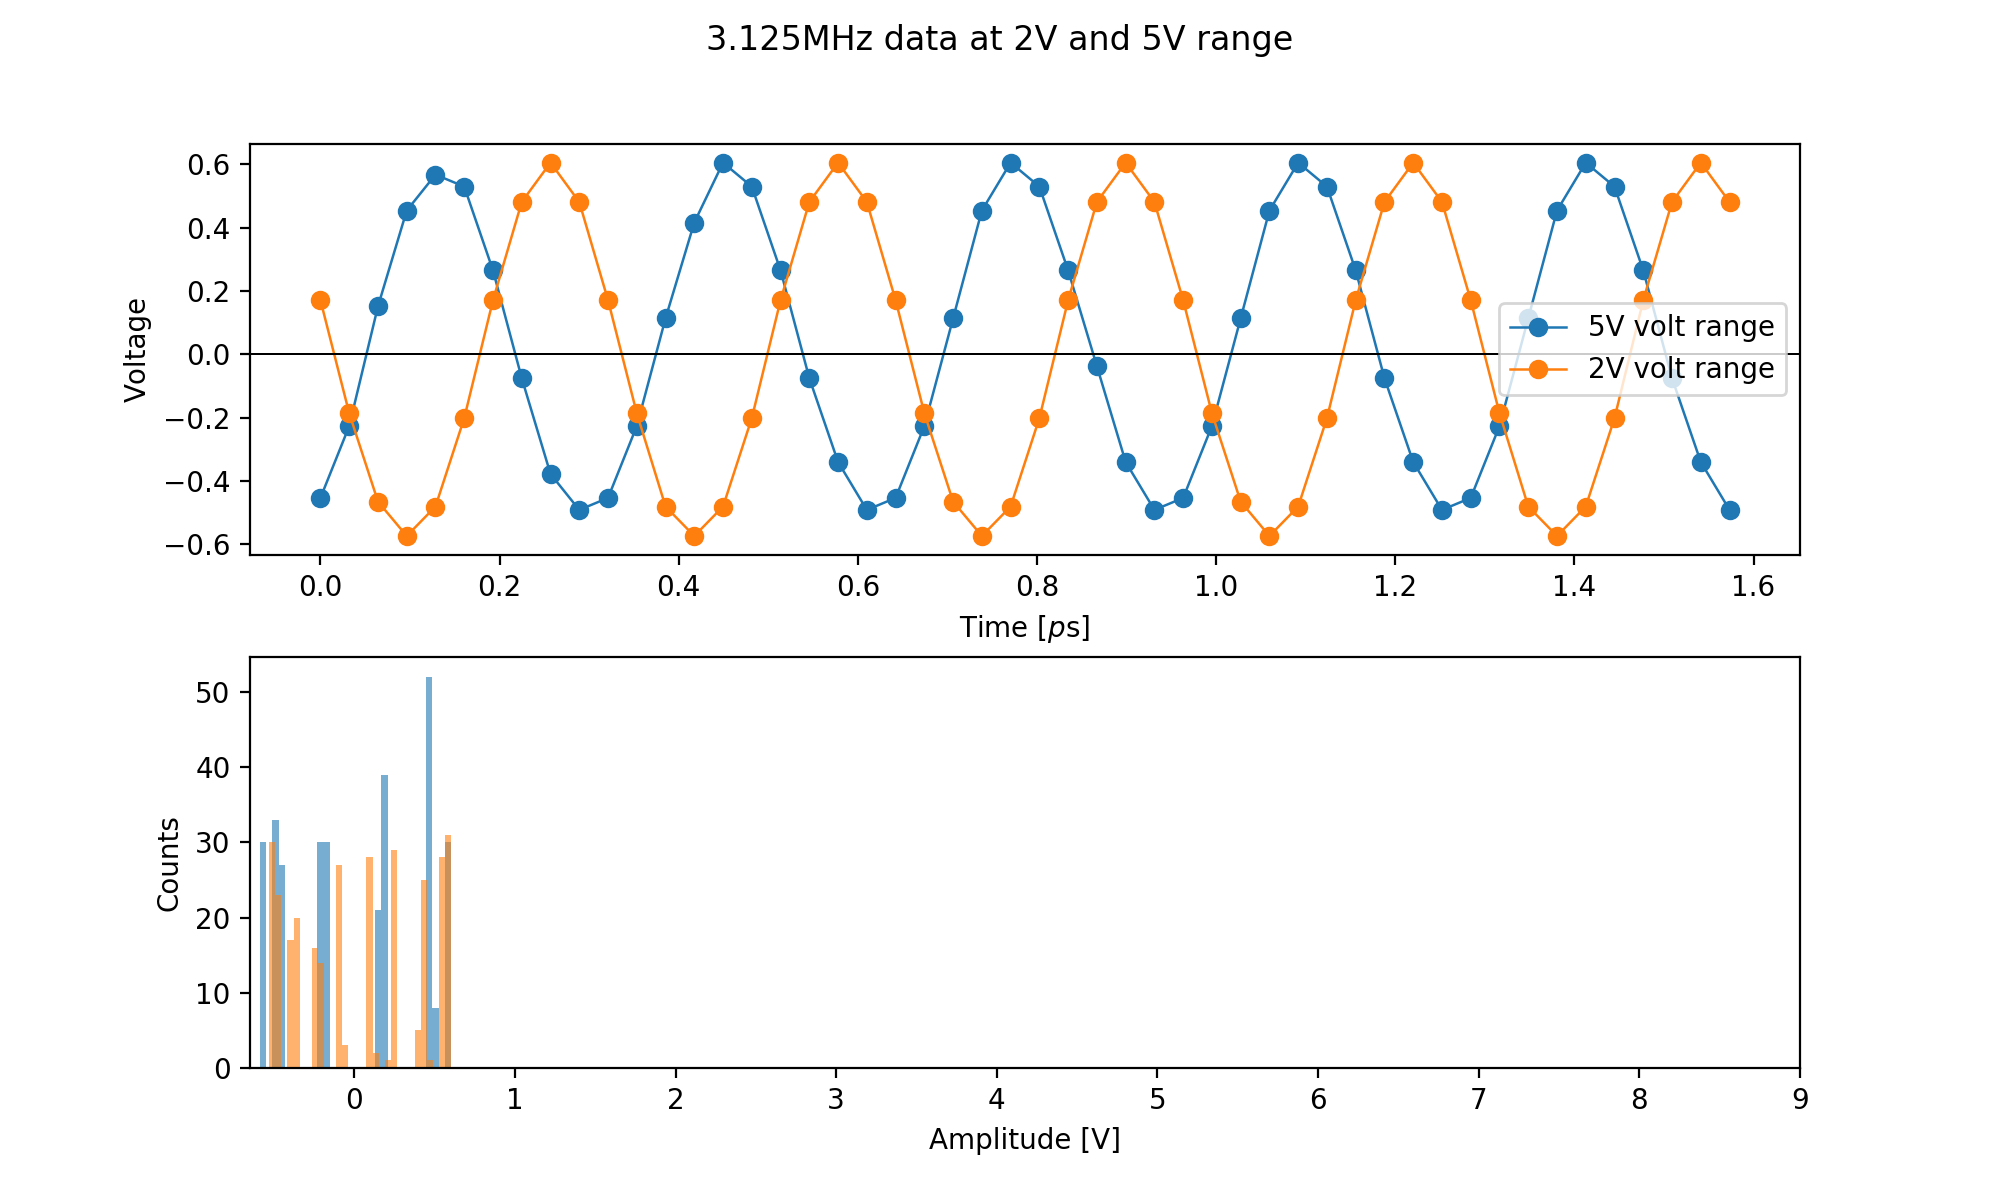

<ipython-input-167-76fb126a2714>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [167]:
plot = 0
fig, (ax1, ax2) = plt.subplots(nrows=2,
                               gridspec_kw={
                                   'hspace': .25,
                                   'wspace': .45
                               },
                               figsize=(10, 6))
plt.suptitle(str(v_sig[plot])+'MHz data at 2V and 5V range')
ax1.plot(times[0:50]*1e6, data_5v[plot][0:50], 'o-', lw=.9, alpha=1, label='5V volt range')
ax1.set_xlabel('Time [$p$s]')
ax1.axhline(color='k', lw=.7)
ax1.set_ylabel('Voltage')
ax1.plot(times[0:50]*1e6, data_2v[plot][0:50], 'o-', lw=.9, alpha=1, label='2V volt range')
ax1.axhline(color='k', lw=.7)

ax2.hist(data_2v[plot], bins=30, alpha=.6)
ax2.hist(data_5v[plot], bins=30, alpha=.6)
ax2.set_xlabel('Amplitude [V]')
ax2.set_ylabel('Counts')
ax1.legend()
plt.tight_layout()

In [168]:
#Find the period
def avg_period(data, times, nsamples=16000):
    """
    Find the average period of a sampled wave form in ns
    """
    peak = []
    for i in range(nsamples - 1):
        if data[i - 1] < data[i] and data[i + 1] < data[i]:
            peak.append(times[i])
    T = []
    for i in range(len(peak) - 1):
        T.append(peak[i + 1] - peak[i])
    return np.asarray(np.mean(T)) * 1e9


periods_2v = np.array(
    [avg_period(dat, times, nsamples=samples) for dat in data_2v])
periods_5v = np.array(
    [avg_period(dat, times, nsamples=samples) for dat in data_5v])

## Does the period match what you expected?

In [169]:
periods = np.concatenate(
    (periods_2v[np.newaxis], periods_5v[np.newaxis], period[np.newaxis]))
print(
    tabulate(periods.T,
             headers=('2V volt range periods [ns]', '5V volt range periods[ns]',
                      'Scope Periods[ns]'),
             tablefmt='grid'))

+------------------------------+-----------------------------+---------------------+
|   2V volt range periods [ns] |   5V volt range periods[ns] |   Scope Periods[ns] |
+==============================+=============================+=====================+
|                     321.07   |                    321.07   |               320   |
+------------------------------+-----------------------------+---------------------+
|                     160.535  |                    160.535  |               160   |
+------------------------------+-----------------------------+---------------------+
|                     107.144  |                    106.783  |               106   |
+------------------------------+-----------------------------+---------------------+
|                      80.4025 |                     80.2676 |                80   |
+------------------------------+-----------------------------+---------------------+
|                      64.214  |                     64.214  |   

In [170]:
plt.xticks(np.arange(0,10))


([<matplotlib.axis.XTick at 0x13d4e9340>,
 <a list of 10 Text xticklabel objects>)

<IPython.core.display.Javascript object>


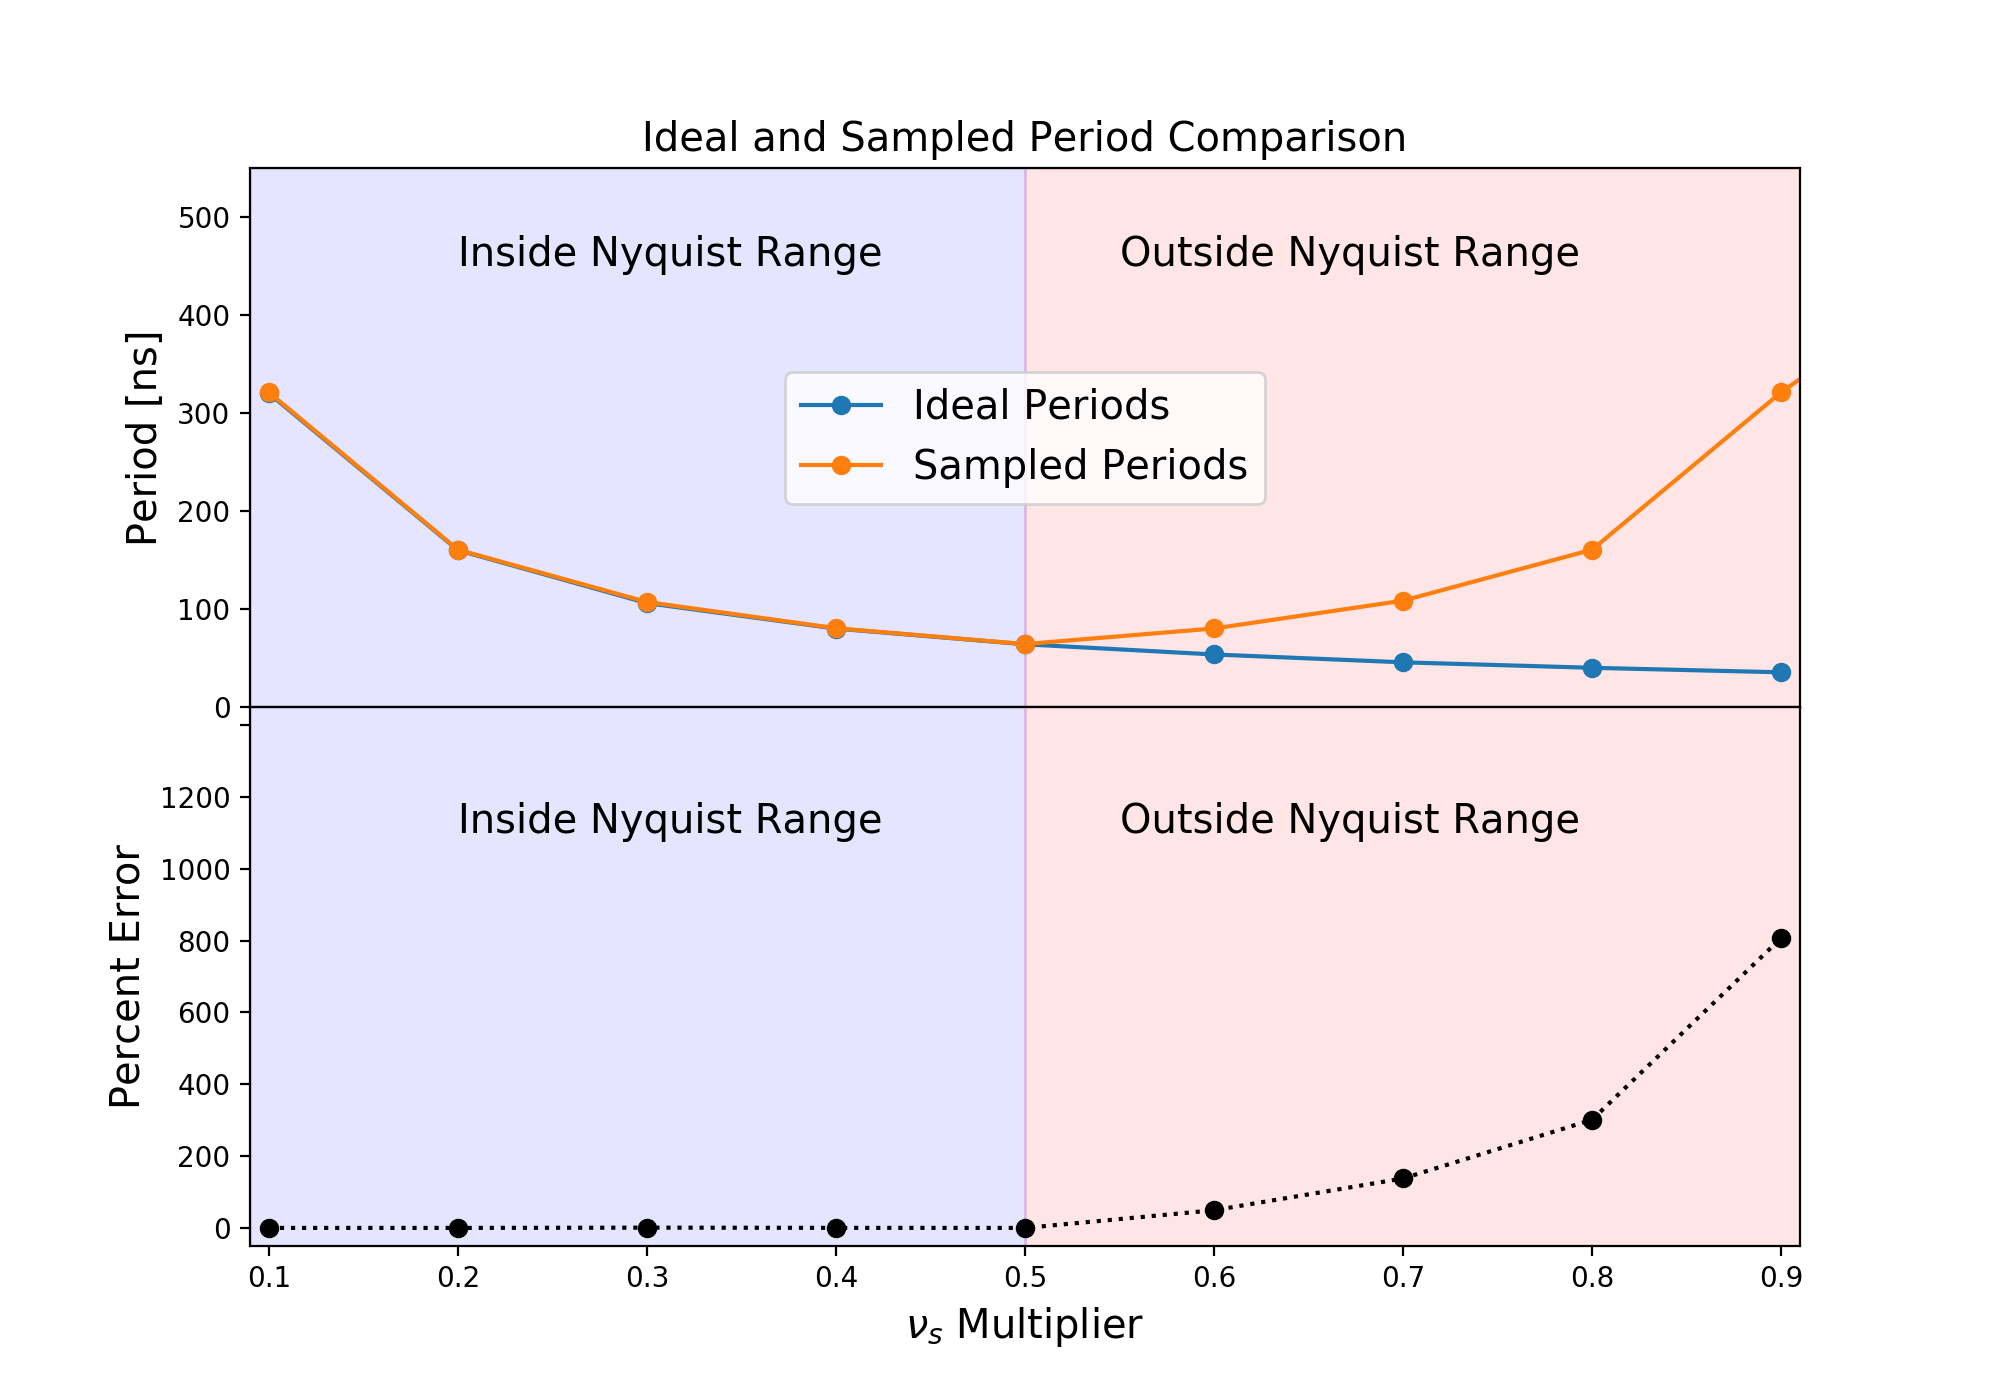

In [171]:
fig, (ax1, ax2) = plt.subplots(nrows= 2, sharex=True, gridspec_kw={'hspace':.00}, figsize=(10,7))
ax1.set_title('Ideal and Sampled Period Comparison', fontsize='x-large')
ax1.plot( period[:9], 'o-', label='Ideal Periods')
ax1.plot( periods_2v, 'o-', label='Sampled Periods')
ax1.fill_between(np.arange(4,10.1), 0,550, alpha=.1, color='r')
ax1.fill_between(np.arange(-.1,4.05,.05), 0,550, alpha=.1, color='b')
ax1.annotate('Inside Nyquist Range', (1,450), fontsize='x-large')
ax1.annotate('Outside Nyquist Range', (4.5,450), fontsize='x-large')
ax1.set_xlim(-.1,8.1)
ax1.set_ylim(0,550)
ax1.set_xticks(np.arange(0,10), [])
ax1.legend(loc='center', fontsize='x-large')


ax2.plot( 100*np.abs(period[:9]-periods_2v[:9])/period[:9], 'o:k', label='Error')
ax2.fill_between(np.arange(4,10.1), -50,1450, alpha=.1, color='r')
ax2.fill_between(np.arange(-.1,4.05,.05), -50,1450, alpha=.1, color='b')

ax2.annotate('Inside Nyquist Range', (1,1100), fontsize='x-large')
ax2.annotate('Outside Nyquist Range', (4.5,1100), fontsize='x-large')
ax2.set_xlim(-.1,9.1)
ax2.set_ylim(-50,1450)
plt.xticks(np.arange(0,10), [round(i*.1,2) for i in range(1,10)])

ax2.set_xlabel(r'$\nu_s$ Multiplier', fontsize='x-large')
ax1.set_ylabel('Period [ns]', fontsize='x-large')
ax2.set_ylabel('Percent Error', fontsize='x-large')

plt.setp(ax2.get_yticklabels()[-2], visible=False)    
plt.setp(ax1, xlim=(-.1,8.1))

plt.show()
plt.savefig('Period.pdf')

In [172]:
# power spectrum
E_2v = [np.fft.fft(dat) for dat in data_2v]
power_2v = [np.abs(e)**2 for e in E_2v]
E_5v = [np.fft.fft(dat) for dat in data_5v]
power_5v = [np.abs(e)**2 for e in E_5v]
times = np.linspace(0, samples / (v_sample*1e6), samples)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

In [173]:
%matplotlib notebook

## what is the minimum sampling rate that accurately reproduces the spectral frequency in the sampled data?

In [174]:
data = np.load('/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/7_8125/7_8125.npz')['arr_0'][200:500]

In [175]:
power_7 = np.abs(np.fft.fft(data))**2

<IPython.core.display.Javascript object>


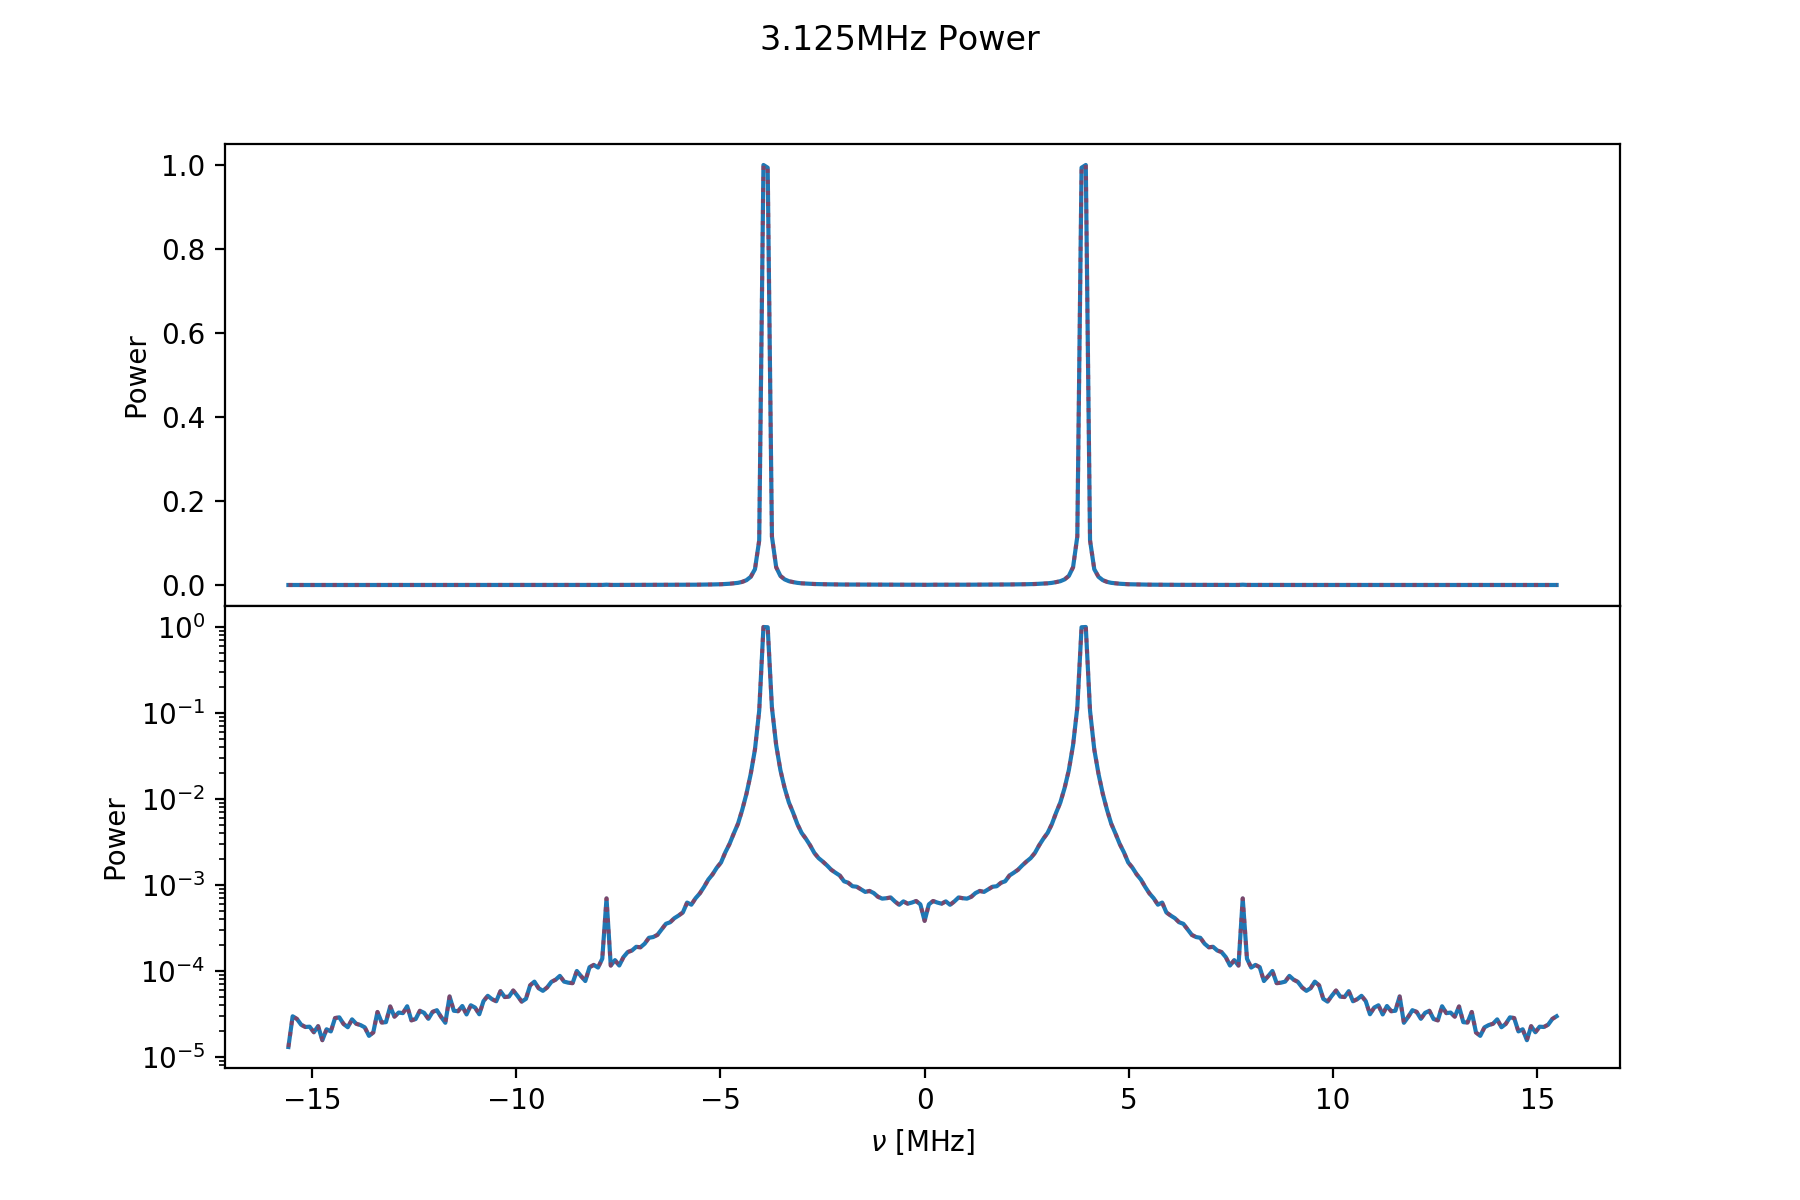

Text(0, 0.5, 'Power')

In [176]:
plot = 0
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0}, figsize=(9,6))
plt.suptitle(str(v_sig[plot]) + 'MHz Power')
ax1.plot(
    np.fft.fftshift(freqs) / 1e6,
    np.fft.fftshift(power_7 / power_7.max()))
ax1.plot(np.fft.fftshift(freqs)/1e6, np.fft.fftshift(power_7/power_7.max()), ':r', alpha=.4)
ax1.set_xlabel(r'$\nu$' + ' [MHz]')
ax1.set_ylabel('Power')
ax2.semilogy(
    np.fft.fftshift(freqs) / 1e6,
    np.fft.fftshift(power_7 / power_7.max()))
ax2.semilogy(np.fft.fftshift(freqs)/1e6, np.fft.fftshift(power_7/power_7.max()), ':r', alpha=.4)
ax2.set_xlabel(r'$\nu$' + ' [MHz]')
ax2.set_ylabel('Power')


Reproduced untill $V_0>.5V_s$

# 5.3 Voltage Spectra and Power Spectra

* What does it mean, that the voltage spectra are complex? 
* What do the real and imaginary parts represent? 
* Is the imaginary part less 'real' than the real part?
* What does it mean, for frequencies to be negative versus positive?
* When you compare the plots for several independent data captures of the same sine wave, do the voltage spectra repeat identically? Why not? 
* What is happening when sometimes the real portions are positive or negative? 
* When the imaginary portions have more amplitude than the real ones?

<IPython.core.display.Javascript object>


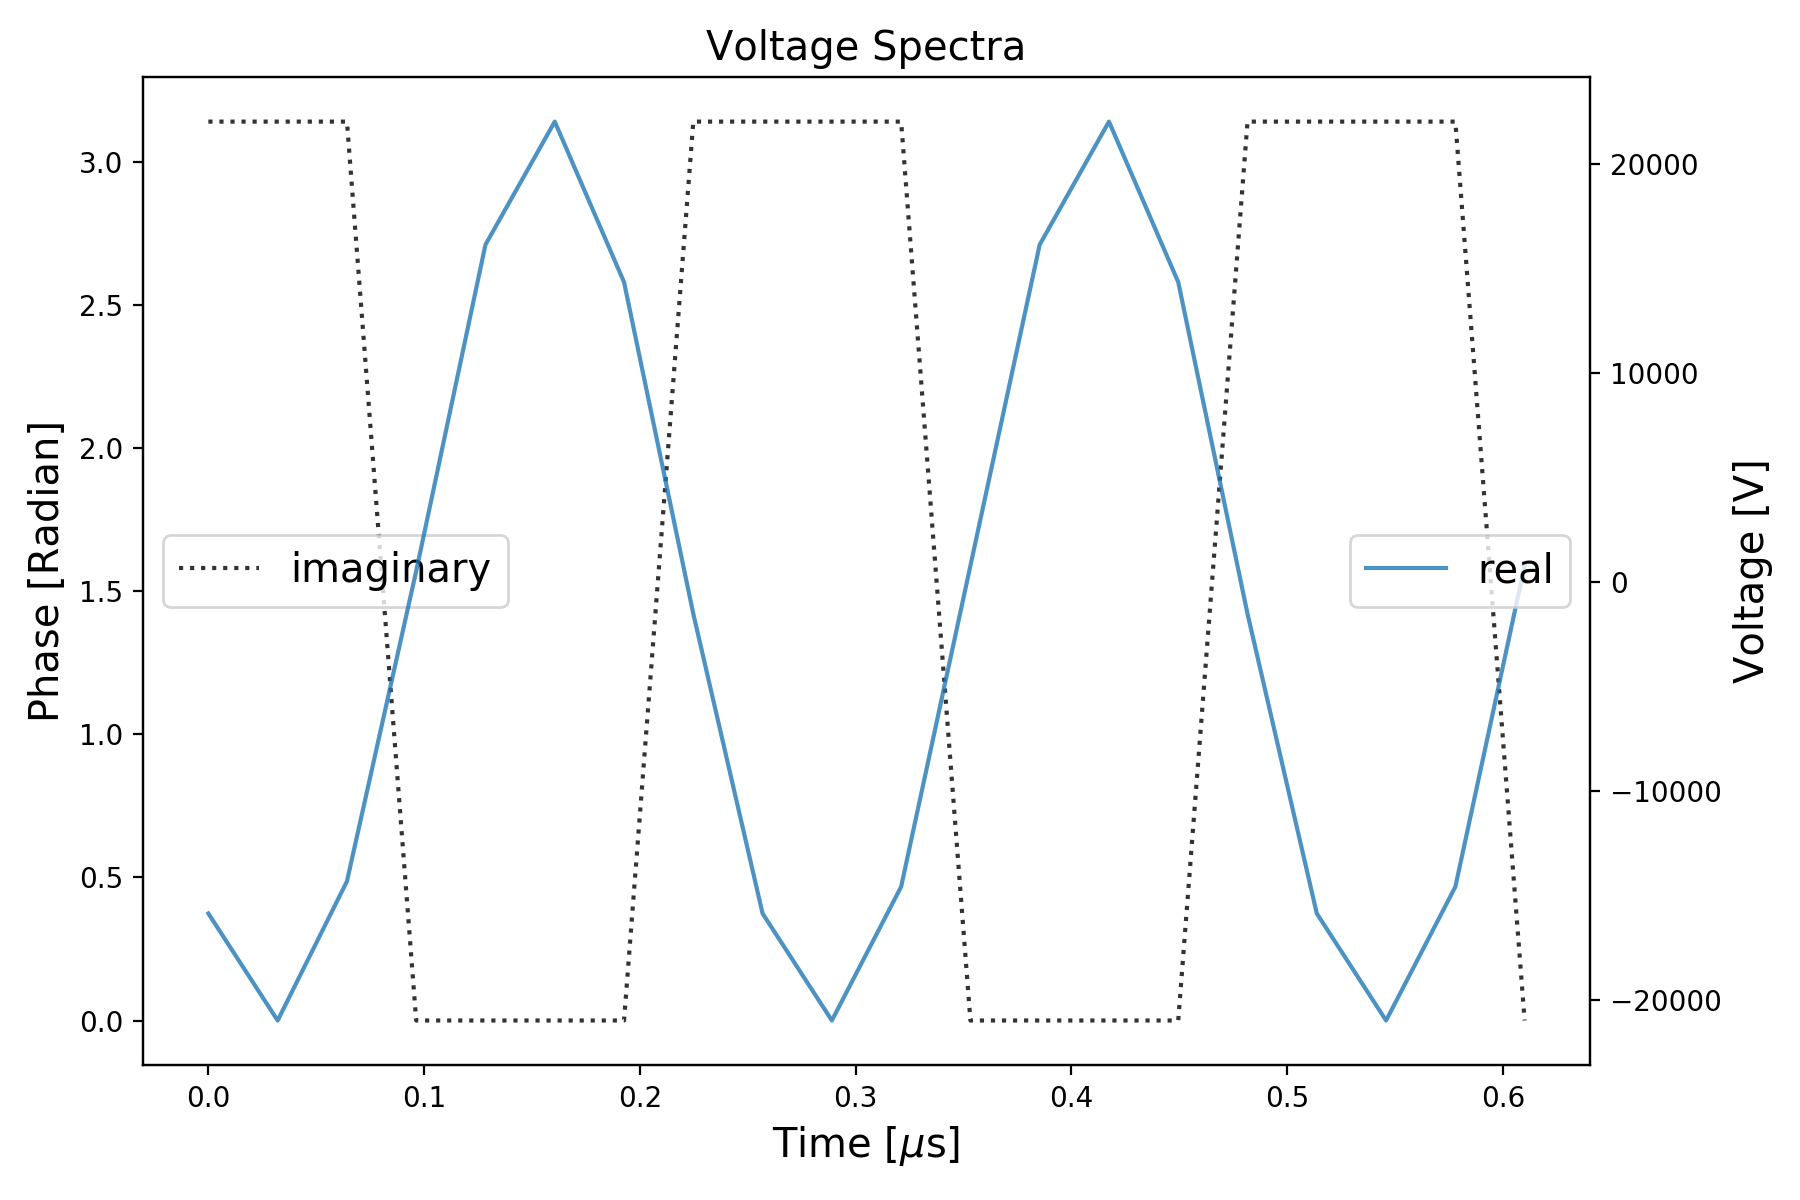

In [177]:
#Plot the real and imaginary portions
plt.figure(figsize=(9,6))
plt.title('Voltage Spectra', fontsize='x-large')
# plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.abs(np.fft.fft(data[0])))), '--k', lw=.8)
plt.plot(times[:20]*1e6, np.angle(data[:20]), ':k', label='imaginary', alpha=.8)
plt.legend(loc = 'center left', fontsize='x-large')
plt.ylabel('Phase [Radian]', fontsize='x-large')
plt.xlabel(r'Time [$\mu$s]', fontsize='x-large')
plt.twinx()
plt.plot(times[:20]*1e6,np.real(data[:20]), label='real', alpha=.8)
plt.ylabel('Voltage [V]', fontsize='x-large')
plt.legend(loc = 'center right', fontsize='x-large')
plt.tight_layout()
plt.savefig('Voltage_spectrum.pdf')

<IPython.core.display.Javascript object>


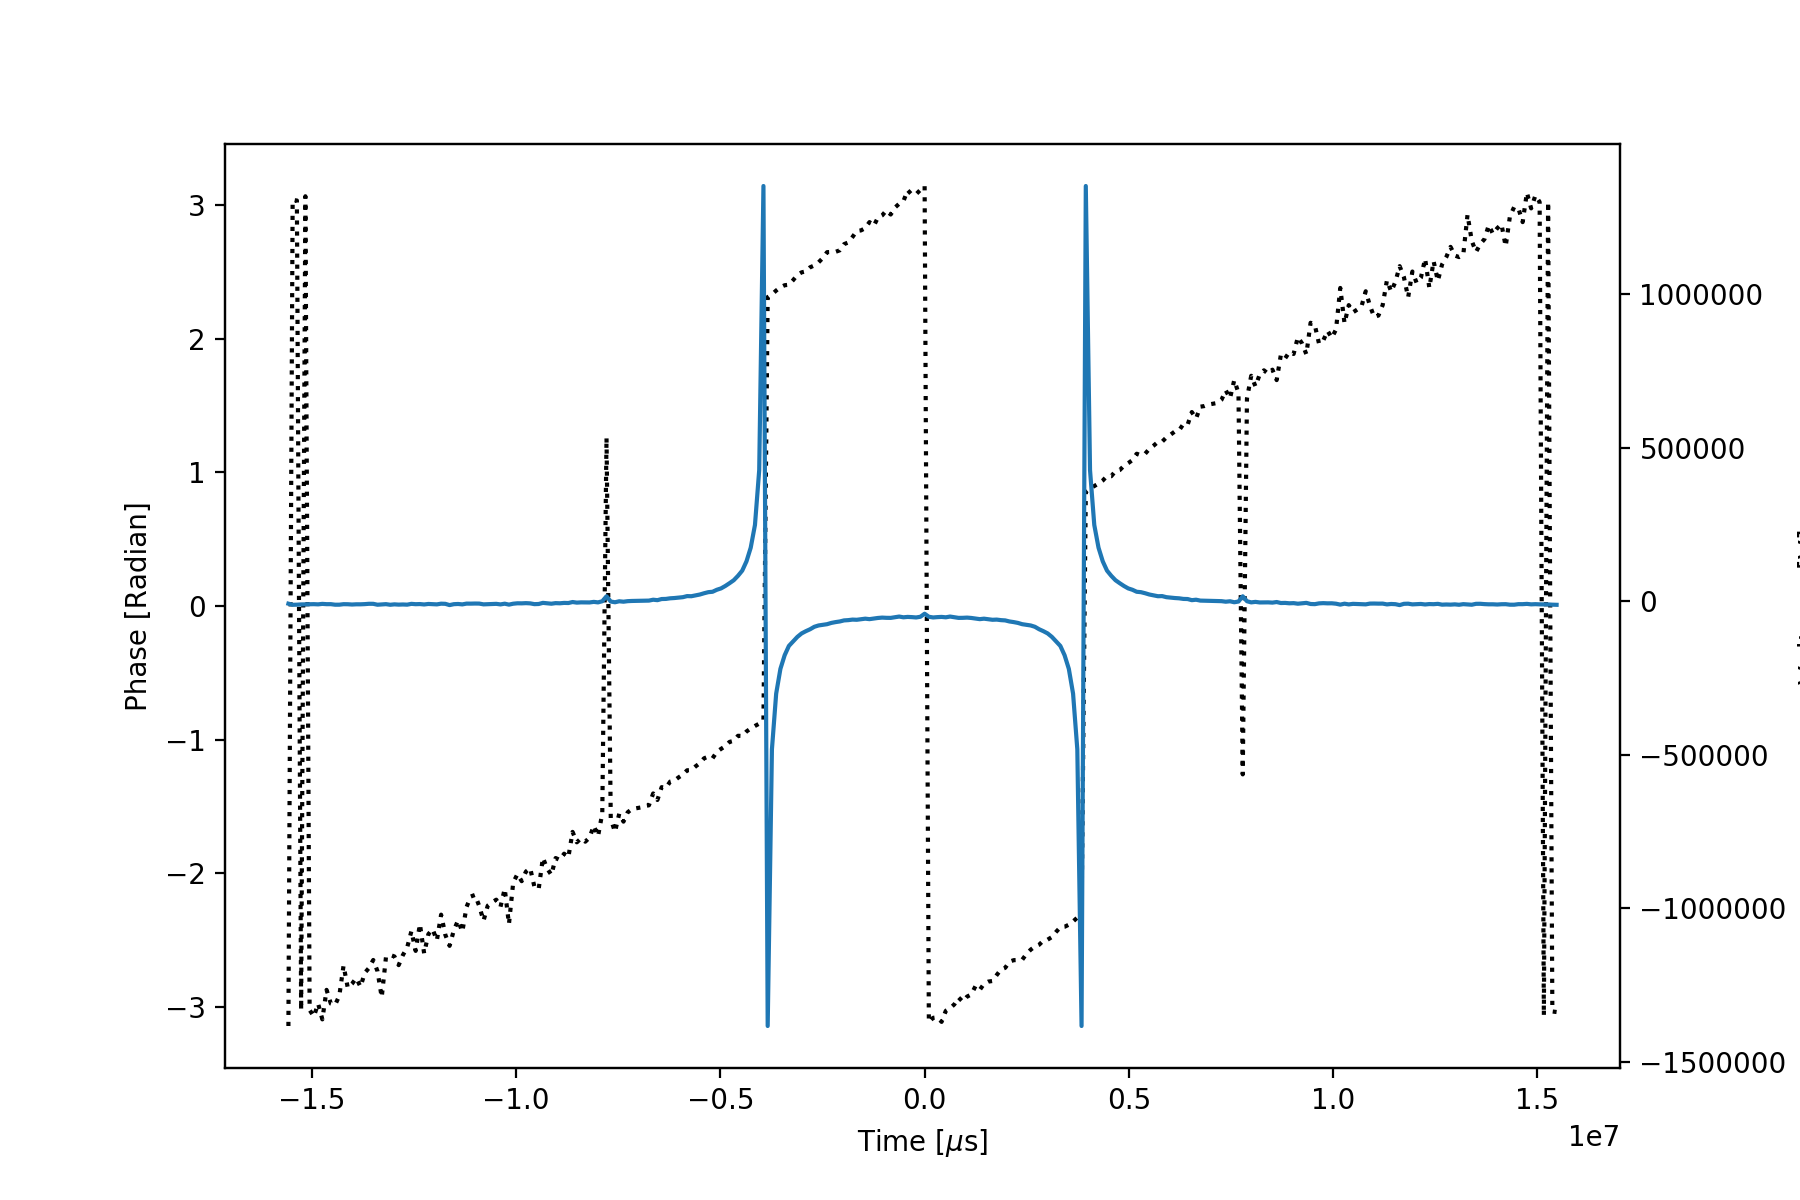

Text(0, 0.5, 'Voltage [V]')

In [178]:
#Plot the real and imaginary portions
plt.figure(figsize=(9,6))
# plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.abs(np.fft.fft(data[0])))), '--k', lw=.8)
plt.plot( np.fft.fftshift(freqs), np.angle(np.fft.fftshift(np.fft.fft(data))), ':k', label='imaginary')
plt.ylabel('Phase [Radian]')
plt.xlabel(r'Time [$\mu$s]')
plt.twinx()
plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.fft.fft(data))), label='real')
plt.ylabel('Voltage [V]')

* What kind of symmetry do the power spectral points exhibit? 
* Why might we use power spectra instead of voltage spectra, and vice versa?

<IPython.core.display.Javascript object>


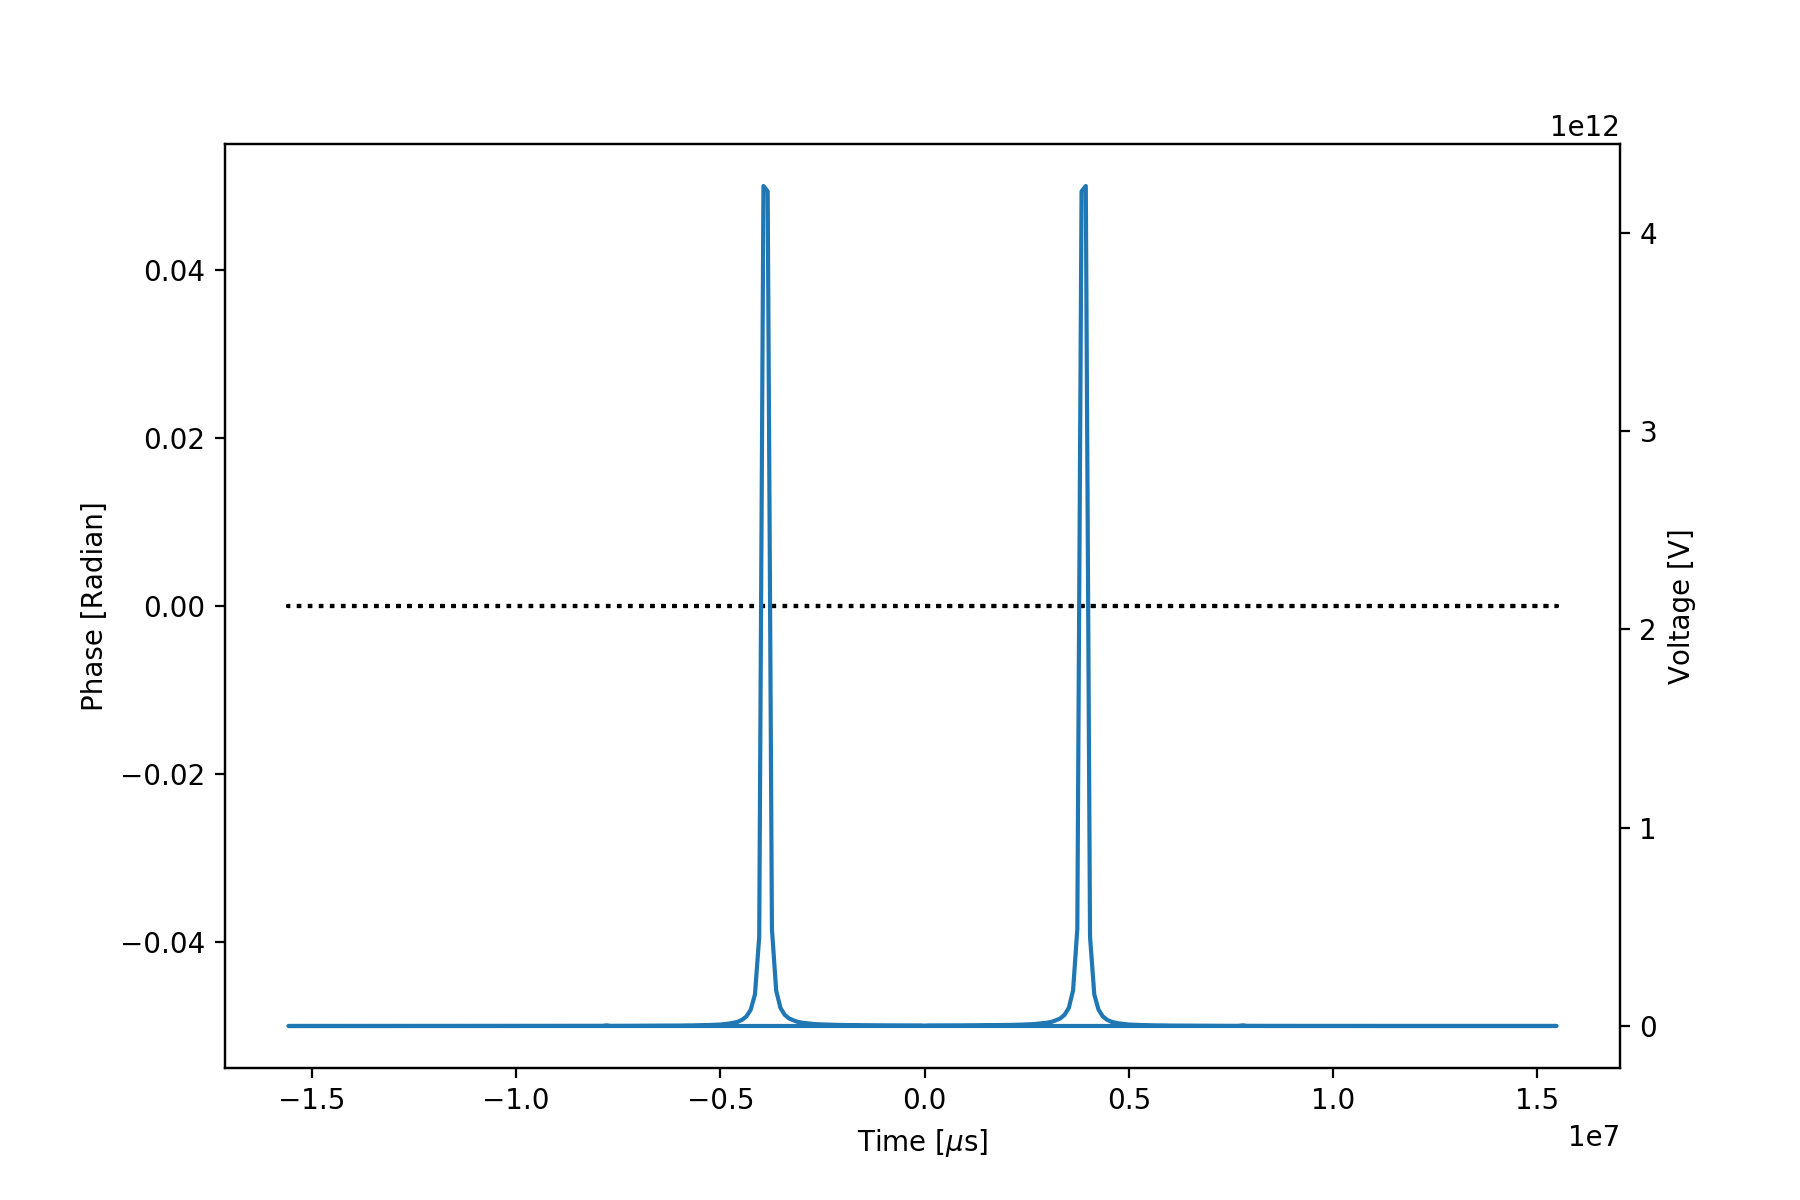

Text(0, 0.5, 'Voltage [V]')

In [179]:

plt.figure(figsize=(9,6))
# plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.abs(np.fft.fft(data[0])))), '--k', lw=.8)
plt.plot(freqs, np.angle(power_7), ':k', label='imaginary')
plt.ylabel('Phase [Radian]')
plt.xlabel(r'Time [$\mu$s]')
plt.twinx()
plt.plot(freqs,np.real(power_7), label='real')
plt.ylabel('Voltage [V]')



In [180]:
from scipy import correlate

In [186]:
# Auto correlation
ftpower = [np.fft.ifft(np.abs(np.fft.fft(dat))**2) for dat in data_2v]
ac = [np.fft.ifft(np.fft.fft(dat) * np.conj(np.fft.fft(dat))) for dat in data_2v]
nac = [np.correlate(dat, dat, mode='same') for dat in data_2v]
sac = [correlate(dat, dat, mode='same') for dat in data_2v]

<ipython-input-186-f19a4c9c4595>:5: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  sac = [correlate(dat, dat, mode='same') for dat in data_2v]


<IPython.core.display.Javascript object>


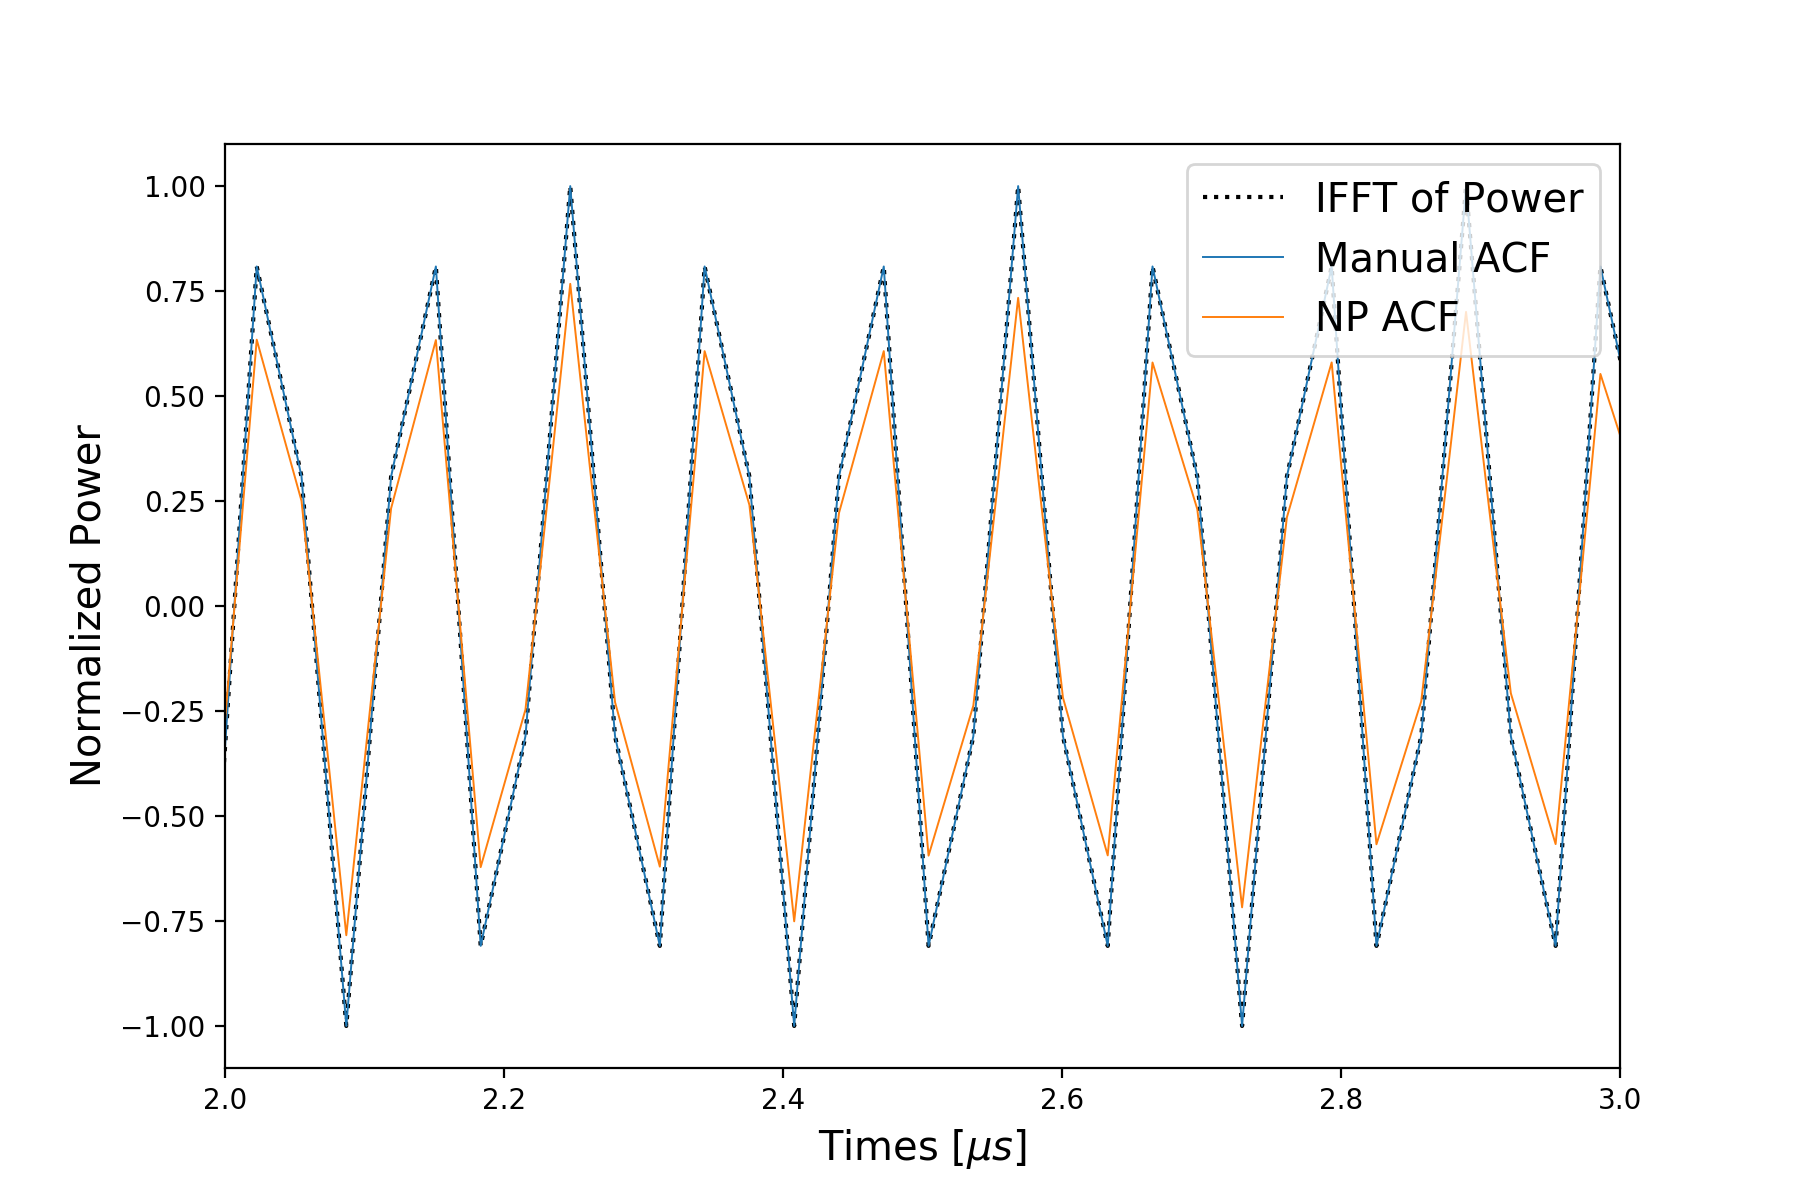

In [194]:
box = 6
plt.figure(figsize=(9,6))
plt.plot(times*1e6, ftpower[box]/ftpower[box].max(),':k', label='IFFT of Power')
plt.plot(times*1e6, np.fft.fftshift(ac[box] / ac[box].max()), '-', label='Manual ACF', lw=.7)
plt.plot(times*1e6, np.fft.fftshift(nac[box] / nac[box].max()), label='NP ACF', lw=.7)
plt.xlabel(r'Times [$\mu s$]', fontsize='x-large')
plt.ylabel('Normalized Power', fontsize='x-large')
plt.xlim(2,3)
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

<IPython.core.display.Javascript object>


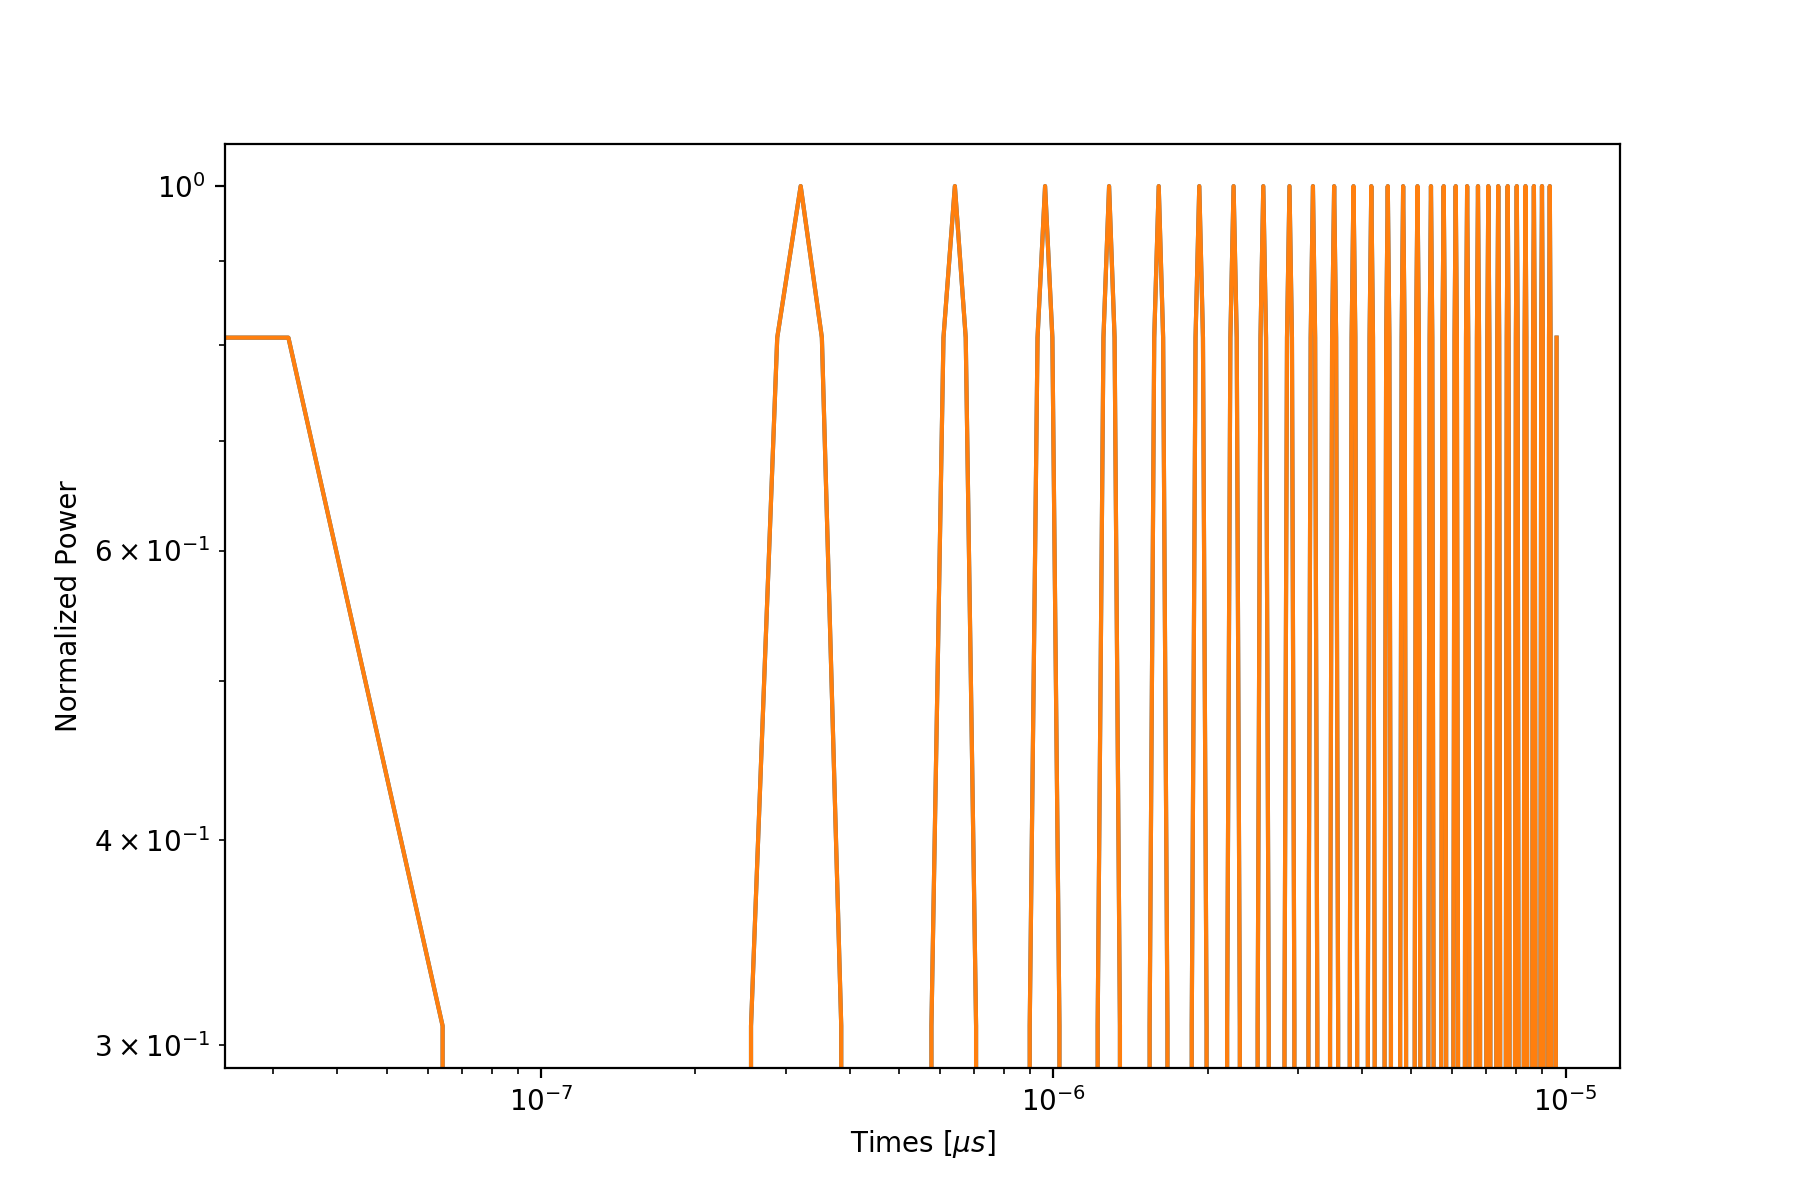

In [189]:
box = 0
plt.figure(figsize=(9,6))
plt.plot(times, ftpower[box]/ftpower[box].max())
plt.semilogy(times, ac[box] / ac[box].max())
# plt.semilogy(times, nac[box] / nac[box].max())
# plt.semilogy(times, sac[box] / sac[box].max(), ':k')
plt.xlabel('Times [$\mu s$]')
plt.ylabel('Normalized Power')
plt.show()

* According to the correlation theorem, the Fourier transform of the power spectrum should equal the ACF. Does it?

# 5.4 Leakage Power

* Can you explain mathematically why you might nd power at  6= 0 using a Discrete Fourier Transform?

In [133]:
data = np.load('/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/7_8125/7_8125.npz')['arr_0'][200:500]

In [134]:
N = 300
v_sample = 31.25e6
times = np.linspace(-N / v_sample, (N / v_sample - 1) / 2, N)
leakage_freqs = [np.linspace(-v_sample / 2, v_sample / 2 * (1 - 2 / (i*N)),i*N) for i in range(1,8)]



In [135]:
import dft

In [136]:
# leakage_power = np.abs(dft.dft(data, t=times, f=leakage_freqs[6], vsamp=v_sample)[1])**2 

In [137]:
times = np.linspace(0, N  / (v_sample), N )
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

In [138]:
from scipy.signal import get_window as gw

In [139]:
len(data)

300

In [140]:
leakage_boxcar = np.abs(np.fft.fft(data))**2
leakage_bh = np.abs(np.fft.fft(data*gw('blackmanharris', len(data))))**2
leakage_hann = np.abs(np.fft.fft(data*gw('hann', len(data))))**2
leakage_triangle = np.abs(np.fft.fft(data*gw('triangle', len(data))))**2

<IPython.core.display.Javascript object>


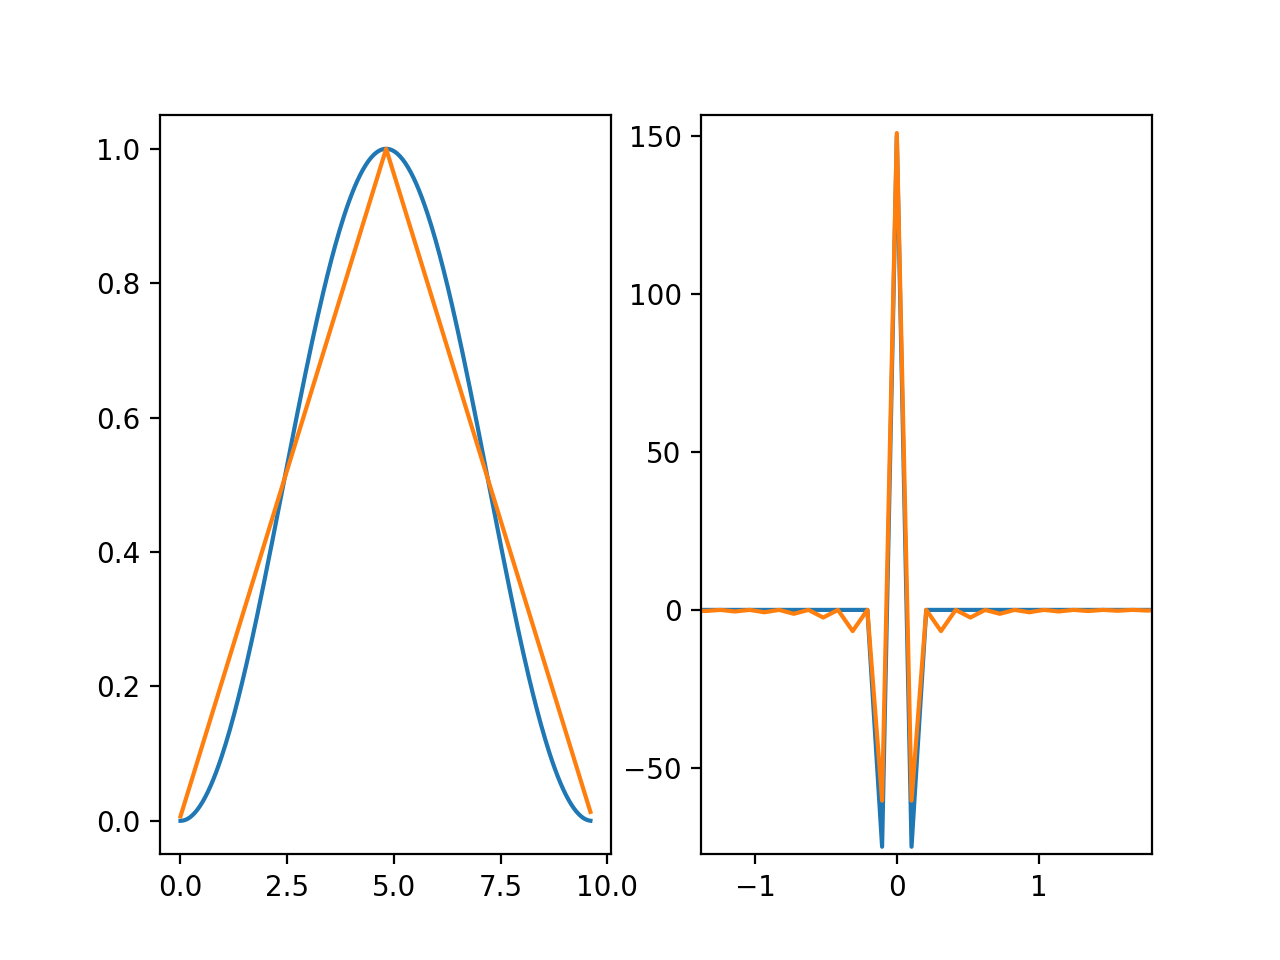

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [145]:
plt.figure()
plt.subplot(122)
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(np.fft.fft(gw('hann', len(data)))))
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(np.fft.fft(gw('triangle', len(data)))))


# plt.xlim(-.02,.02)
plt.subplot(121)
plt.plot(times*1e6, gw('hann', len(data)))
plt.plot(times*1e6, gw('triangle', len(data)))



<IPython.core.display.Javascript object>


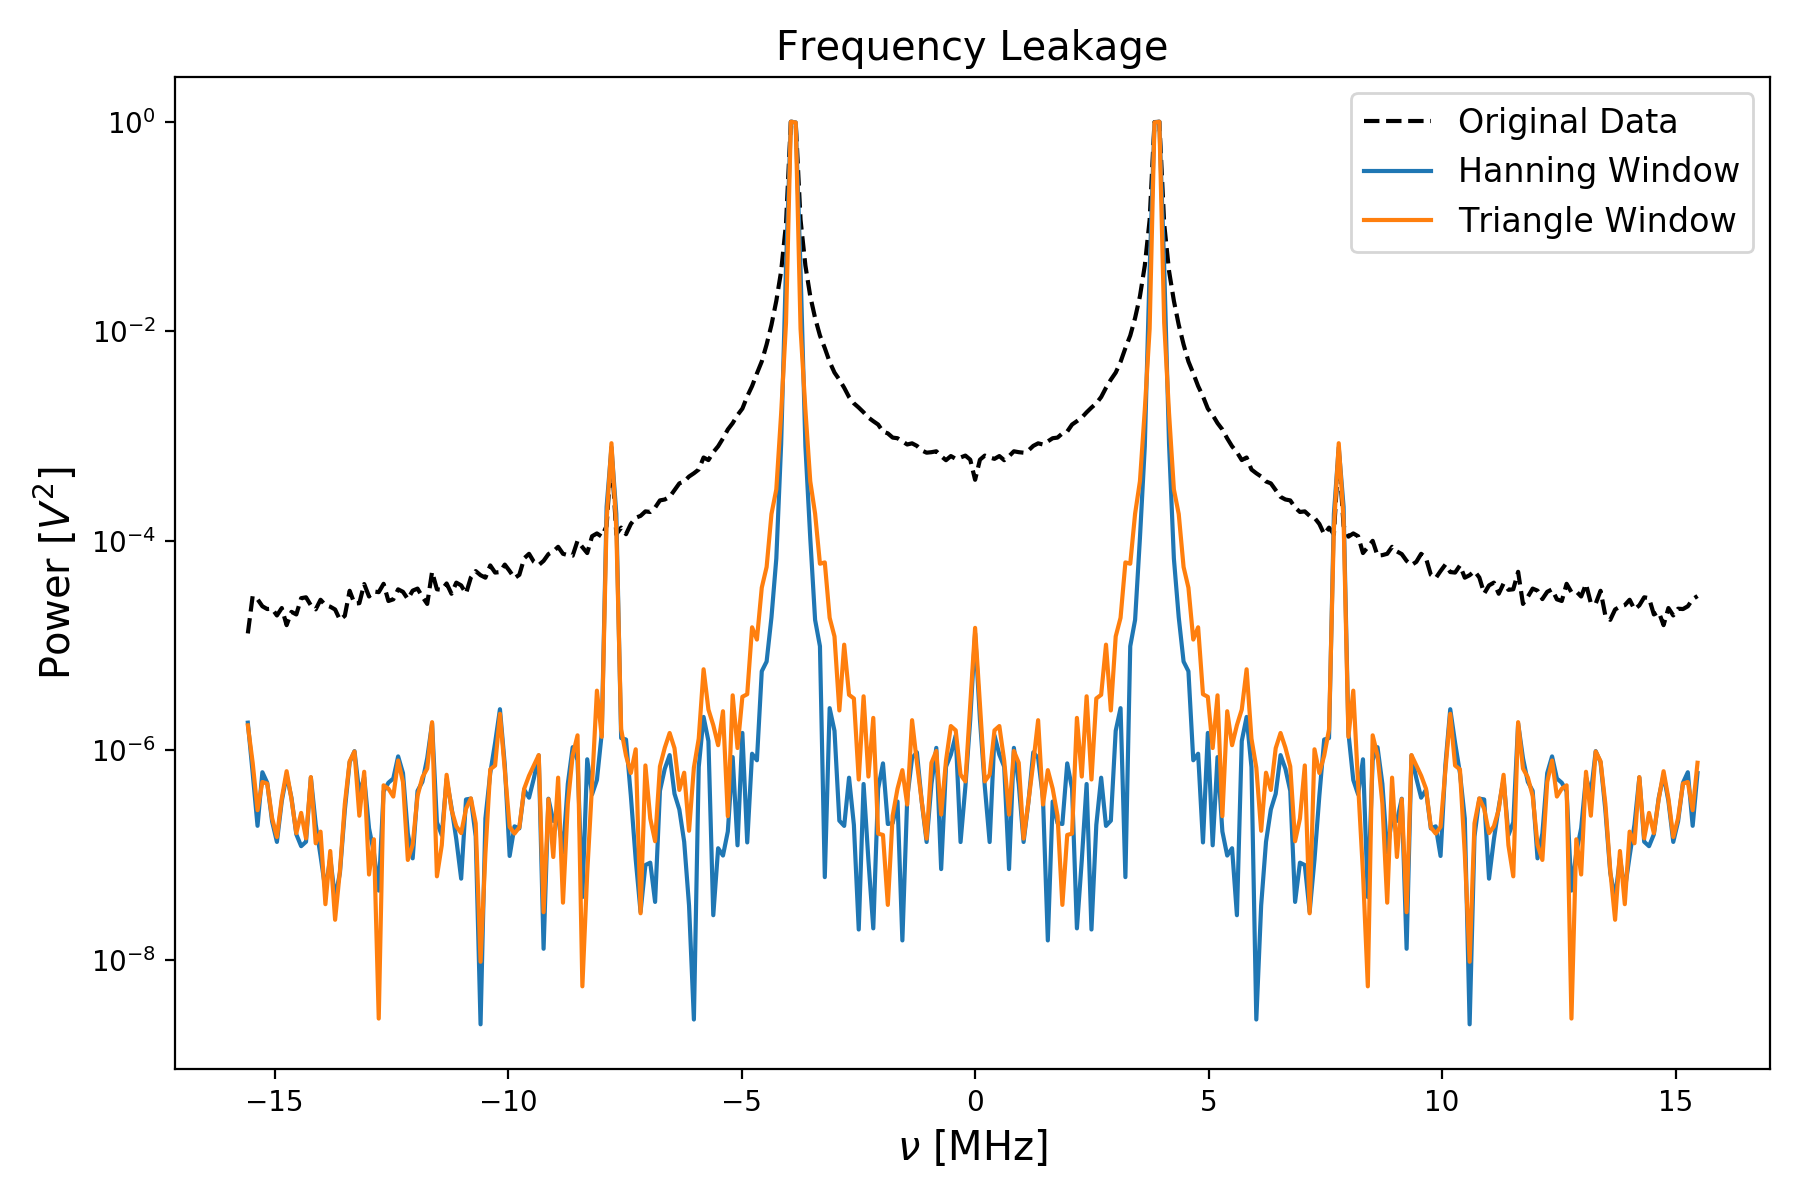

In [147]:
plt.figure(figsize=(9,6))
plt.title('Frequency Leakage', fontsize='x-large')
# for i in range(7):
# plt.plot(leakage_freqs[6]/1e6, leakage_power, label='$N_{freq}$= '+str((i+1))+'N samples', alpha=1)
plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(leakage_boxcar/leakage_boxcar.max()), '--k', label='Original Data')
plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(leakage_hann/leakage_hann.max()), label = 'Hanning Window')
plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(leakage_triangle/leakage_triangle.max()), label='Triangle Window')
# plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(leakage_nuttall))




plt.legend(fontsize='large')
plt.xlabel(r'$\nu$ [MHz]', fontsize='x-large')
plt.ylabel('Power [$V^2$]', fontsize='x-large')
# plt.xlim(.526, .726)
# plt.ylim(0,1.2e12)
plt.tight_layout()
plt.savefig('freq_leak.pdf')

# Frequency Resolution

* How close together can the two frequencies be for you to still distinguish them? 
* This is called the frequency resolution. How does it depend on the number of samples used in the DFT? 
* In particular, how does it compare to time interval that those samples span?
* Can you explain your findings mathematically?

In [406]:
v_sample=31.25e6
samples=16000
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_freq_res/'
fr_files = [file for file in sorted(glob.glob(path + '*'))]
fr_data = [np.load(file)['arr_0'] for file in fr_files]
widths = [
    r'$\Delta\nu$=.003MHz', r'$\Delta\nu$=.005MHz', r'$\Delta\nu$=.05MHz',
    r'$\Delta\nu$=.1MHz', r'$\Delta\nu$=.15MHz', r'$\Delta\nu$=2MHz'
]

In [407]:
fr_power = [np.abs(np.fft.fft(dat))**2 for dat in fr_data]
times = np.linspace(0, samples / (v_sample/1e6), samples)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

<IPython.core.display.Javascript object>


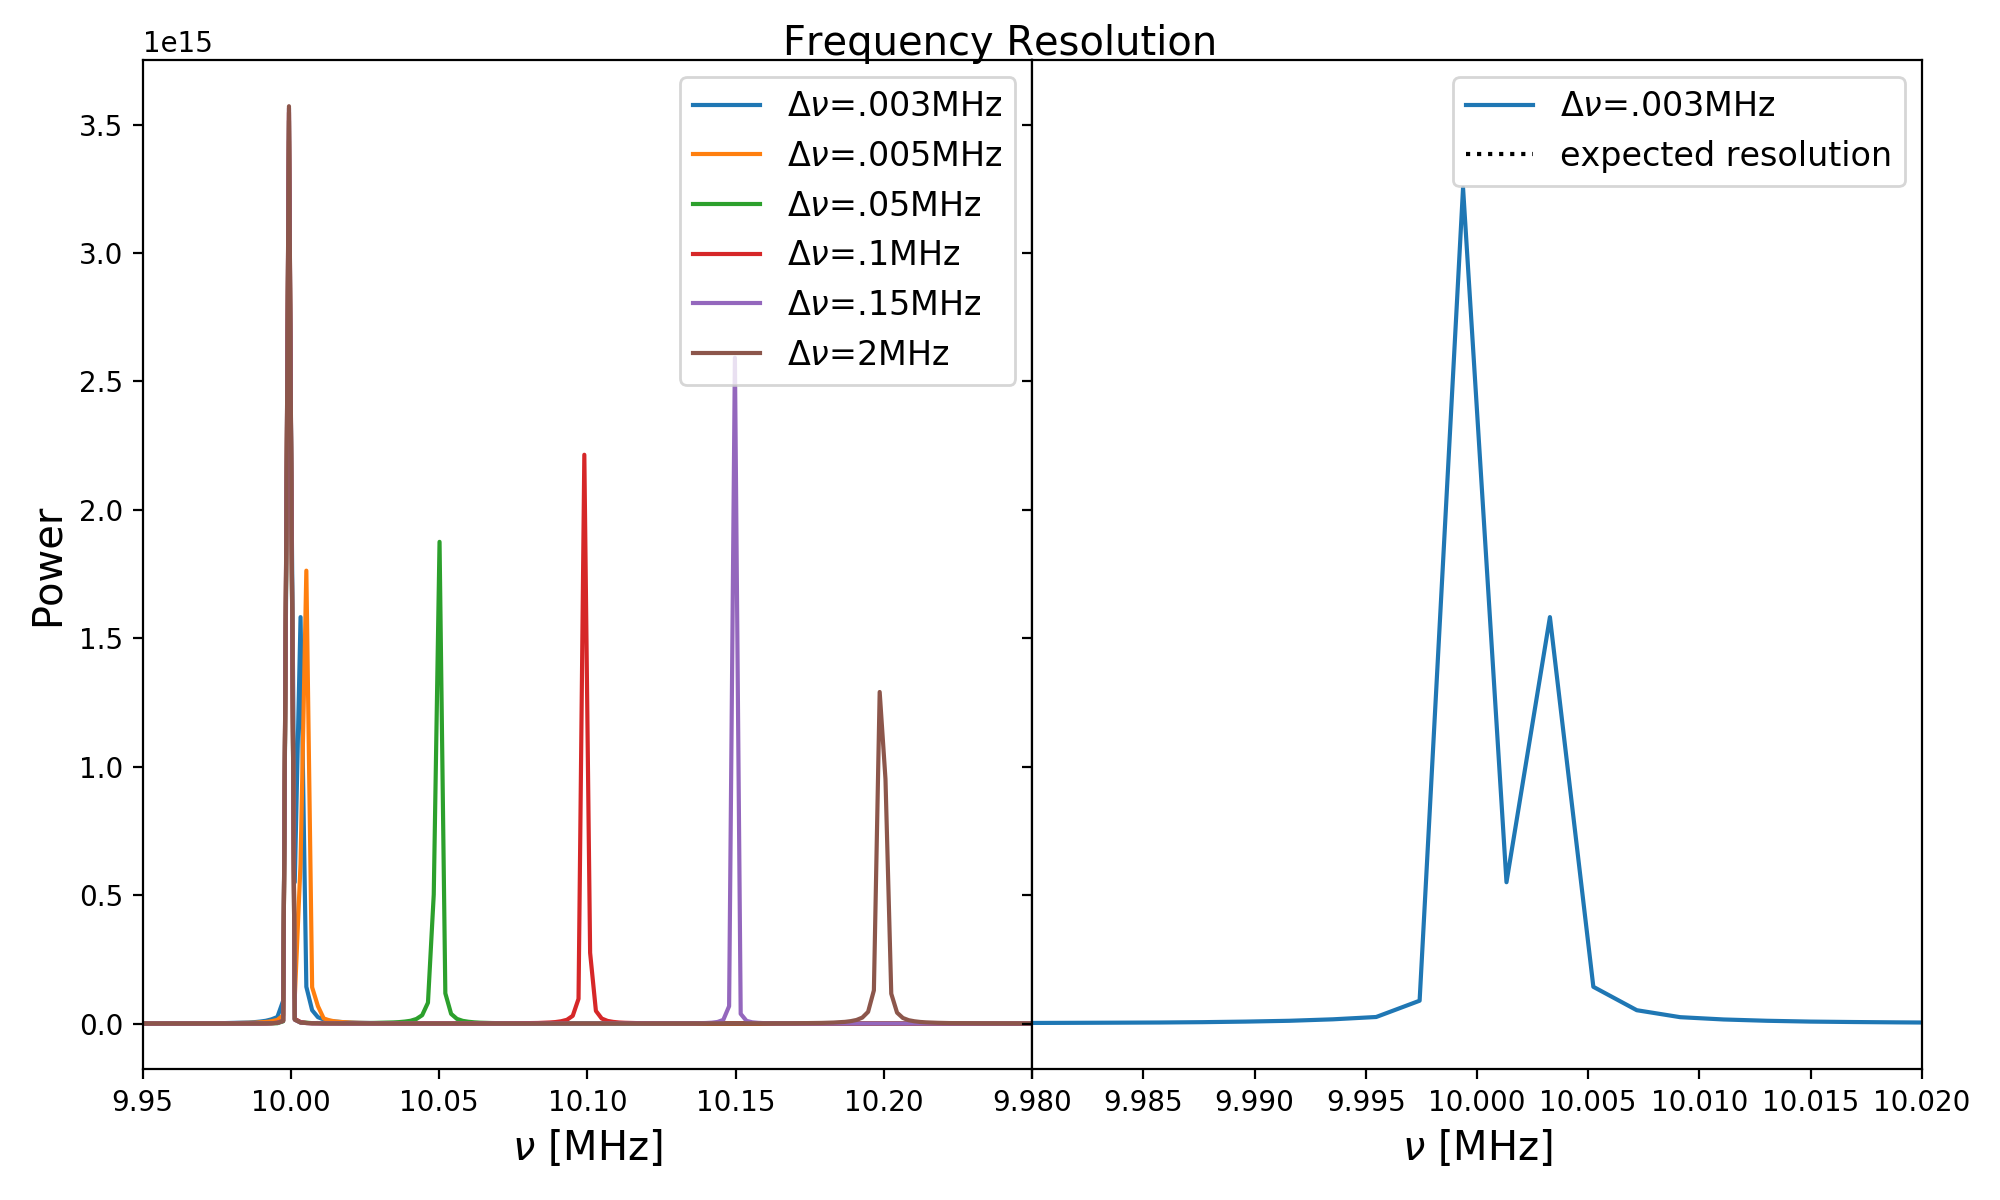

In [408]:
fig, axs = plt.subplots(ncols=2,
                        sharey=True,
                        gridspec_kw={'wspace': 0},
                        figsize=(10, 6))
plt.suptitle('Frequency Resolution', fontsize='x-large')
for p, width in zip(fr_power, widths):
    axs[0].plot(np.fft.fftshift(freqs), np.fft.fftshift(p), label=width)
axs[0].set_xlim(.995e1, 1.025e1)
axs[0].legend( fontsize='large')
axs[1].plot(np.fft.fftshift(freqs),
            np.fft.fftshift(fr_power[0]),
            label=widths[0])
axs[1].set_xlim(.998e1, 1.002e1)
axs[0].set_xlabel(r'$\nu$ [MHz]', fontsize='x-large')
axs[1].set_xlabel(r'$\nu$ [MHz]', fontsize='x-large')
axs[0].set_ylabel(r'Power', fontsize='x-large')
axs[1].axvline(10.001953125, 0, 3.5e15, ls=':', color='k', label='expected resolution')

axs[1].legend( fontsize='large')

# labels = [item.get_text() for item in axs[1].get_xticklabels()]
# axs[1].set_xticklabels([round(float(label), 2) for label in labels])


# plt.setp(axs[1].get_xticklabels()[0], visible=False)    
plt.setp(axs[0].get_xticklabels()[-1], visible=False)    




plt.tight_layout()
plt.savefig('Freq_res.pdf')

In [117]:
10/(2*10.005

0.9995002498750624

In [118]:
%matplotlib notebook

In [409]:
1953.125*2

3906.25

In [120]:
10e6+

SyntaxError: invalid syntax (<ipython-input-120-0a4a21ed2dba>, line 1)

In [121]:
print('What the minimum should be Delta nu: ', 31.25e6 / (16000), 'Hz')

What the minimum should be Delta nu:  1953.125 Hz


# 5.6 Nyquist Window

* How do the spectra in different Nyquist windows compare?

In [365]:
N = 300
v_sample =31.25e6
times = np.linspace(-N / v_sample, (N / v_sample - 1) / 2, N)
window_freqs = [
    np.linspace(-i * v_sample / 2, i * v_sample / 2 * (1 - 2 / N), N)
    for i in np.arange(5, 7)
]
og_freqs = np.linspace(- v_sample / 2, v_sample / 2 * (1 - 2 / N), N)

In [370]:
nw_power = [
    np.abs(dft.dft(data, t=times, f=freq, vsamp=v_sample))**2
    for freq in window_freqs
]
og_power = np.abs(dft.dft(data, t=times, f=og_freqs, vsamp=v_sample))**2

<IPython.core.display.Javascript object>


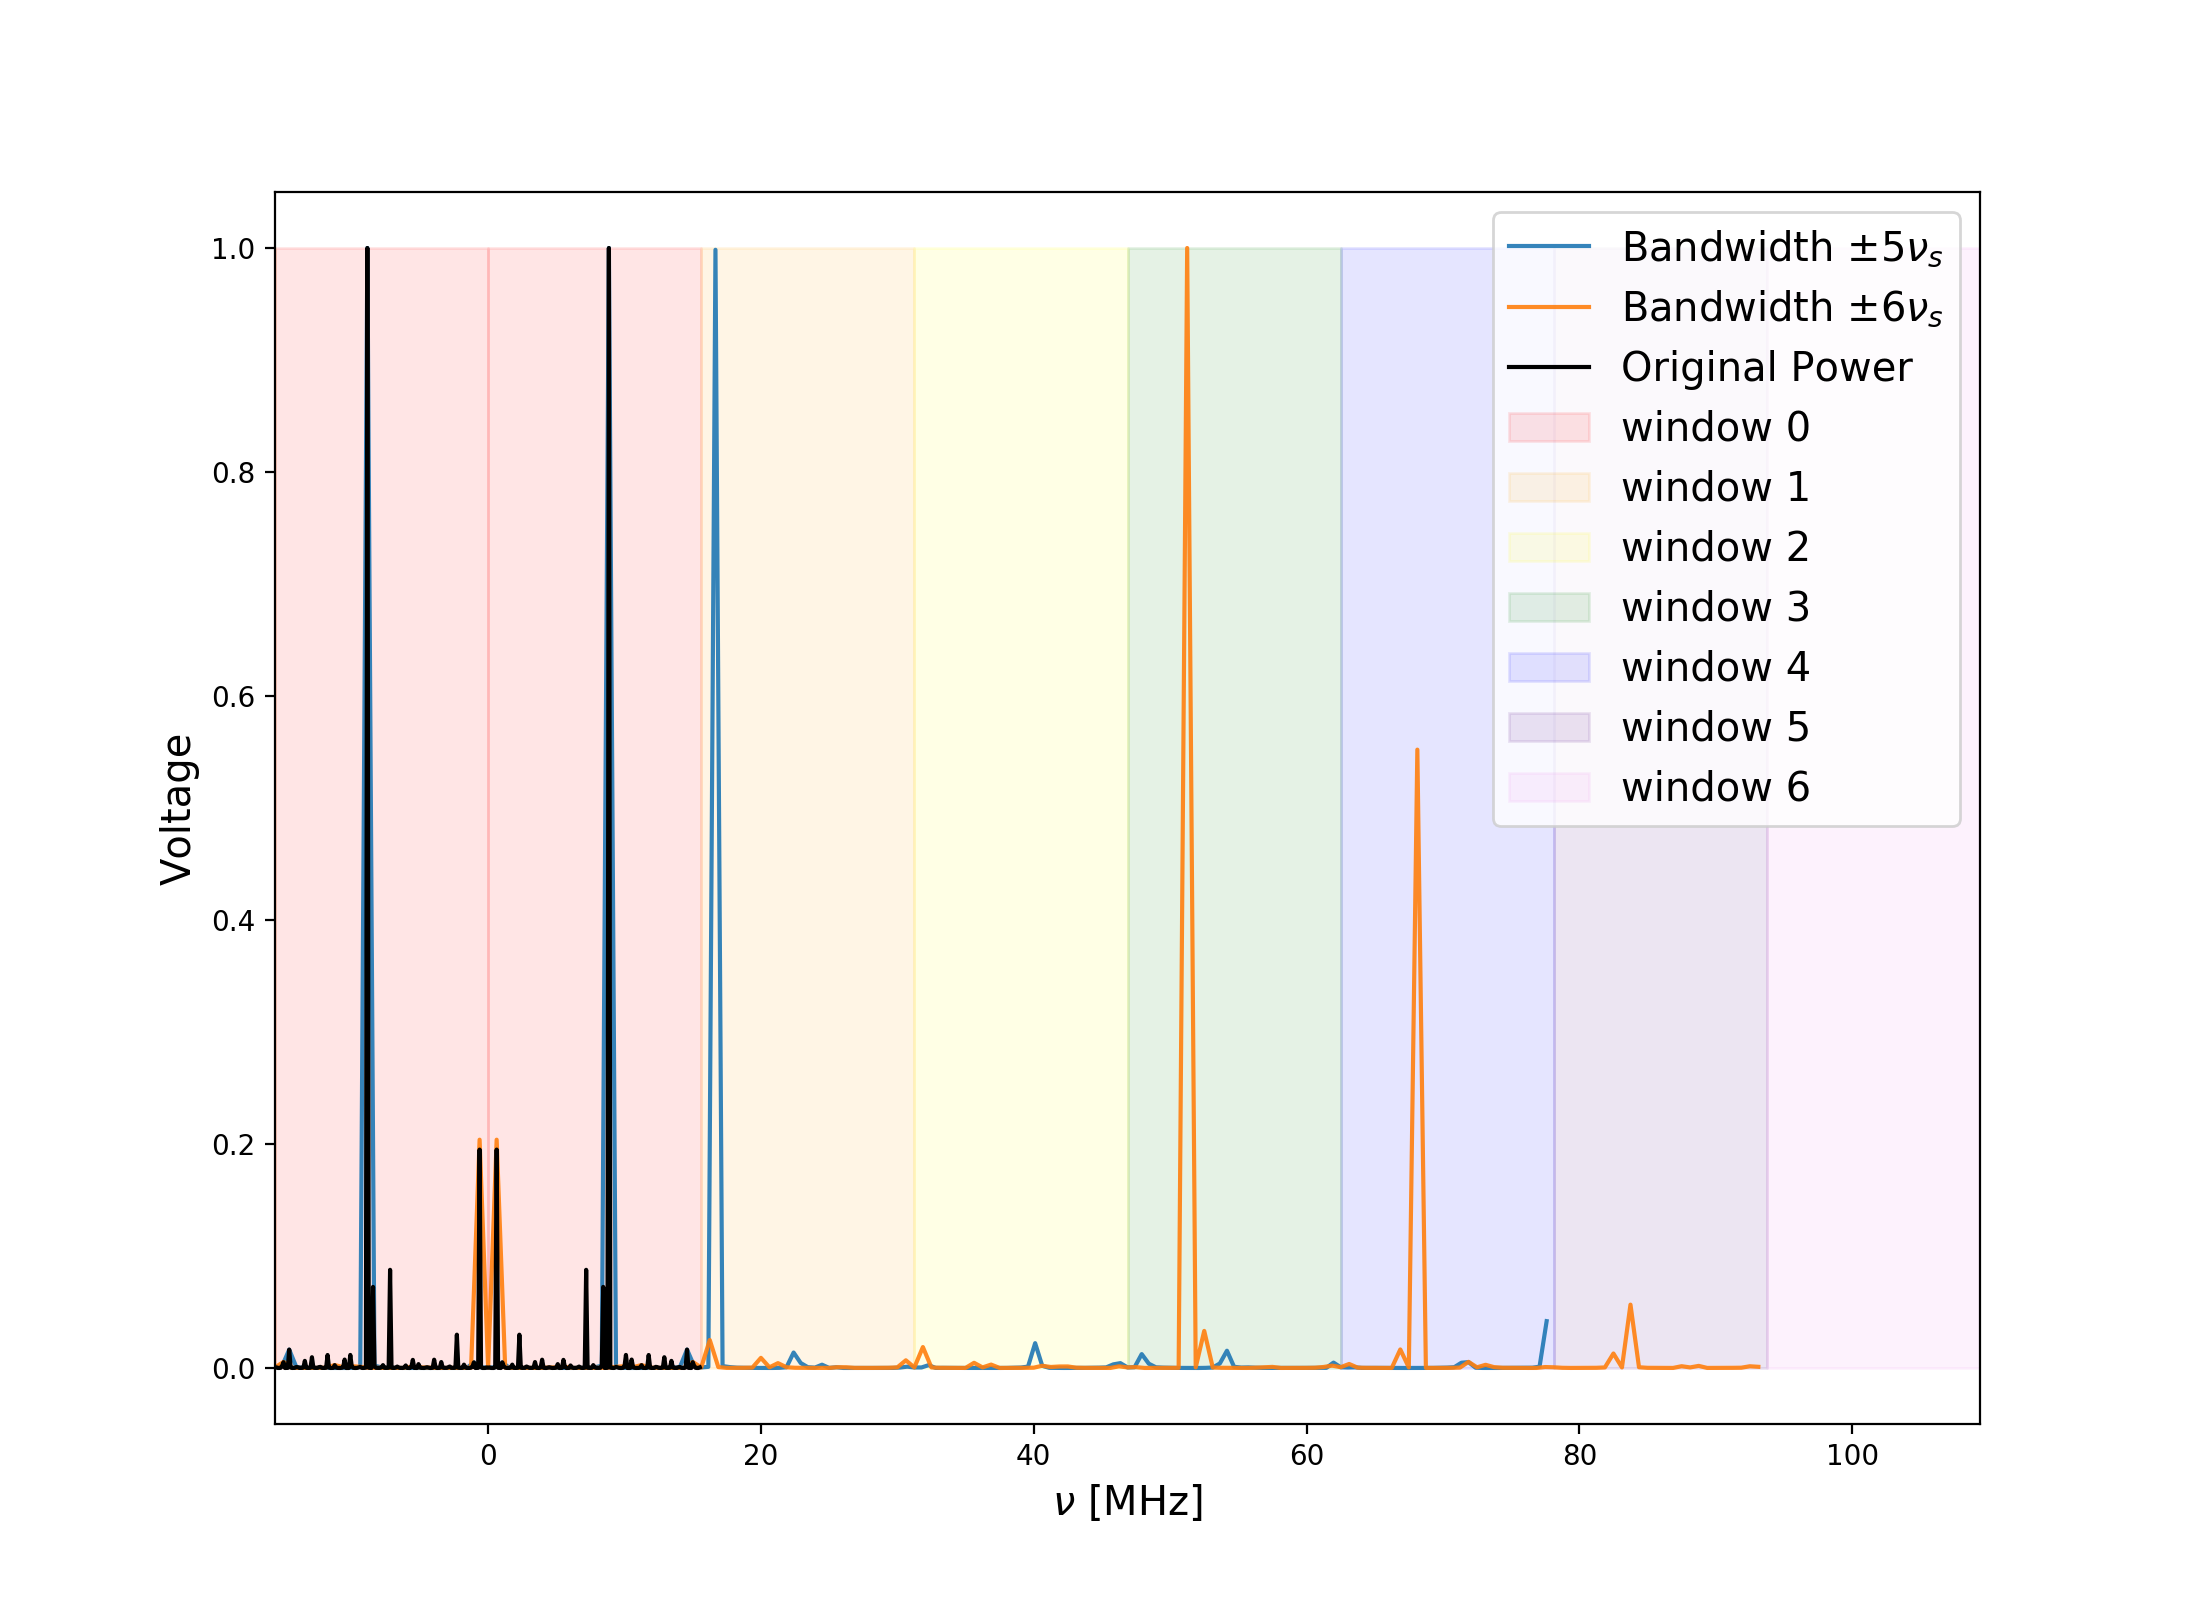

Text(0, 0.5, 'Voltage')

In [372]:
plt.figure(figsize=(11,8))
for p, f, w, in zip(nw_power, window_freqs, np.arange(5, 7)):
    plt.plot(f/1e6, p[1] / p[1].max(), label=r'Bandwidth $\pm$' + str(w)+r'$\nu_{s}$', alpha=.9)
plt.plot(og_freqs/1e6, og_power[1]/og_power[1].max(), '-k', label='Original Power')
colors = ['red', 'orange', 'yellow', 'green', 'blue','indigo','violet']
for i,c in zip(np.arange(7), colors):
#     plt.axvline(v_sample/1e6/2*i, color='k', lw=.4, alpha=.8)
#     plt.axvline(-v_sample/1e6/2*i, color='k', lw=.4, alpha=.8)
    plt.fill_between(np.linspace(v_sample/1e6/2*i, v_sample/1e6/2*(i+1), 100), 0,1, alpha=.1, color=c, label='window '+str(i))
    plt.fill_between(np.linspace(-v_sample/1e6/2*i, -v_sample/1e6/2*(i+1), 100), 0,1, alpha=.1, color=c)

plt.xlim(-v_sample/2/1e6,7*v_sample/2/1e6)
# plt.ylim(0,1)
plt.legend(loc='upper right', fontsize='x-large')
plt.xlabel(r'$\nu$ [MHz]', fontsize='x-large')
plt.ylabel('Voltage', fontsize='x-large')

# 5.7 Noise in Data

TODO
Retake data with a smaller voltage range

In [354]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_noise_data/'
files = sorted(glob.glob(path + '*'))
n_data = [np.load(file)['arr_0'] for file in files]
n_data = [dat / dat.max() for dat in n_data]

* What is the mean voltage over this sample? 
* What is the variance? 
* The standard deviation (which, for a zero-mean signal, is the same as the root-mean-square, or rms)?

In [355]:
print('Mean Voltage: ', round(n_data[3].mean(), 4))
print('Voltage Variance: ', round(n_data[3].var(), 4))
print('Voltage STD: ', round(n_data[3].std(), 4))
print('RMS: ', round(np.sqrt(np.mean(n_data[3]**2)),4))

Mean Voltage:  -0.0007
Voltage Variance:  0.0555
Voltage STD:  0.2356
RMS:  0.2356


In [356]:
[0.2356/np.sqrt(i*6*16000) for i in range(6)]

<ipython-input-356-177be1beabba>:1: RuntimeWarning: divide by zero encountered in double_scalars
  [0.2356/np.sqrt(i*6*16000) for i in range(6)]


[inf,
 0.0007603957303053895,
 0.000537680977284238,
 0.00043901467958245877,
 0.00038019786515269474,
 0.0003400593085526896]

<IPython.core.display.Javascript object>


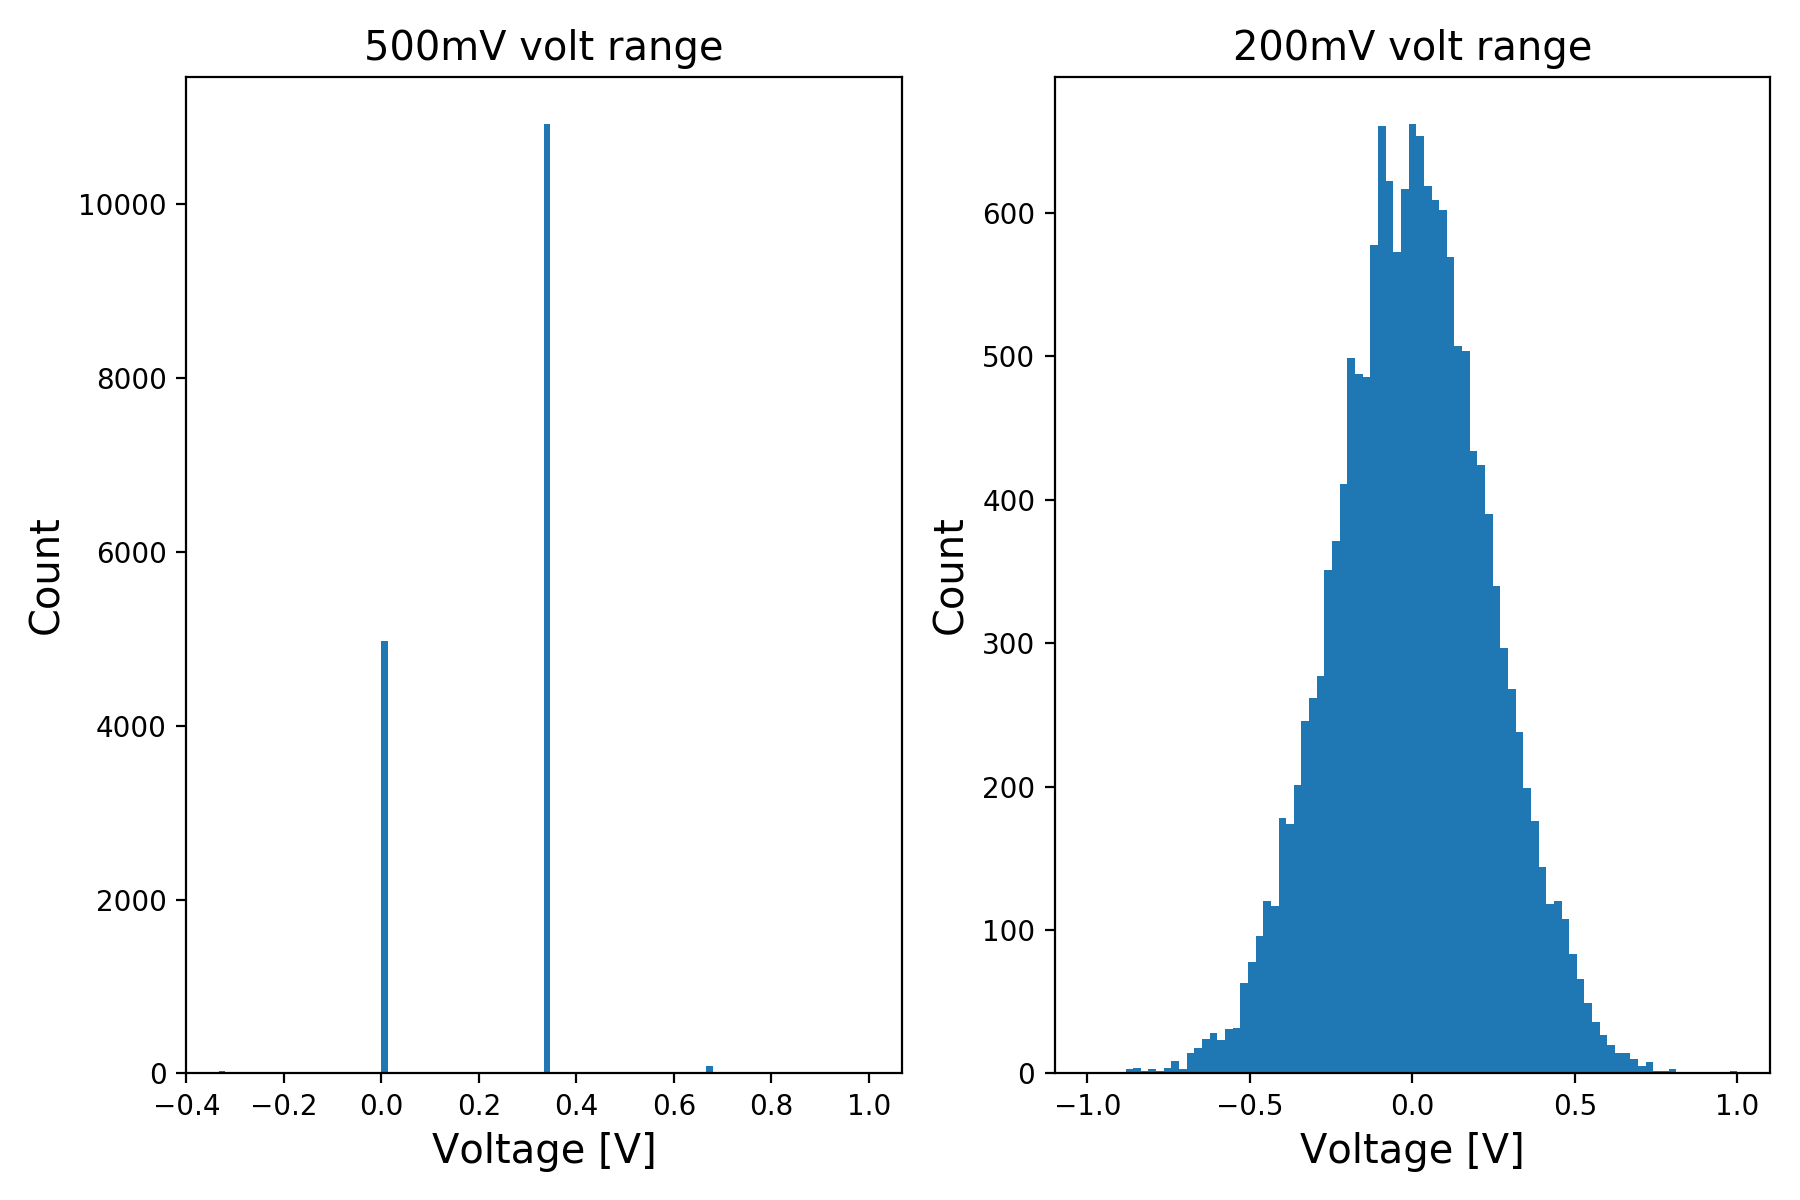

In [357]:
fig, ax = plt.subplots(ncols=2, sharey=False, gridspec_kw={'hspace':0}, figsize=(9,6))
ax[0].set_title('500mV volt range', fontsize='x-large')
ax[0].hist(n_data[2], bins=100)
ax[1].set_title('200mV volt range', fontsize='x-large')
ax[1].hist(n_data[3], bins=85)
ax[0].set_ylabel('Count', fontsize='x-large')
ax[1].set_ylabel('Count', fontsize='x-large')
ax[0].set_xlabel('Voltage [V]', fontsize='x-large')
ax[1].set_xlabel('Voltage [V]', fontsize='x-large')
plt.tight_layout()
plt.savefig('gaussian_hist.pdf')

* Overplot this theoretically-expected Gaussian. Does it look like your observed distribution?

In [358]:
blocks = np.arange(0, 16000 * 32, 16000)
power_500mV = []
power_200mV = []
for i in range(32):
    if i == 0:
        continue
    elif i == 1:
        power_500mV.append(np.abs(np.fft.fft(n_data[0][:blocks[i]]))**2)
        power_200mV.append(np.abs(np.fft.fft(n_data[1][:blocks[i]]))**2)


    else:
        power_500mV.append(np.abs(np.fft.fft(n_data[0][blocks[i - 1]:blocks[i]]))**2)
        power_200mV.append(np.abs(np.fft.fft(n_data[1][blocks[i - 1]:blocks[i]]))**2)

In [359]:
v_sample= 31.25
times = np.linspace(0, 16000 / (v_sample*1e6), 16000)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

In [360]:
power_mean_200mV = [np.mean(np.asarray(power_200mV[:int(2**n)]), axis=0) for n in range(0,6)]
# power_mean_500mV = np.mean([power_500mV[:int(2**n)]*np.e**n for n in range(0,6)], axis=0)

In [361]:
std = [np.std(power_mean_200mV[i]/power_mean_200mV[i].max()) for i in range(6)]

<IPython.core.display.Javascript object>


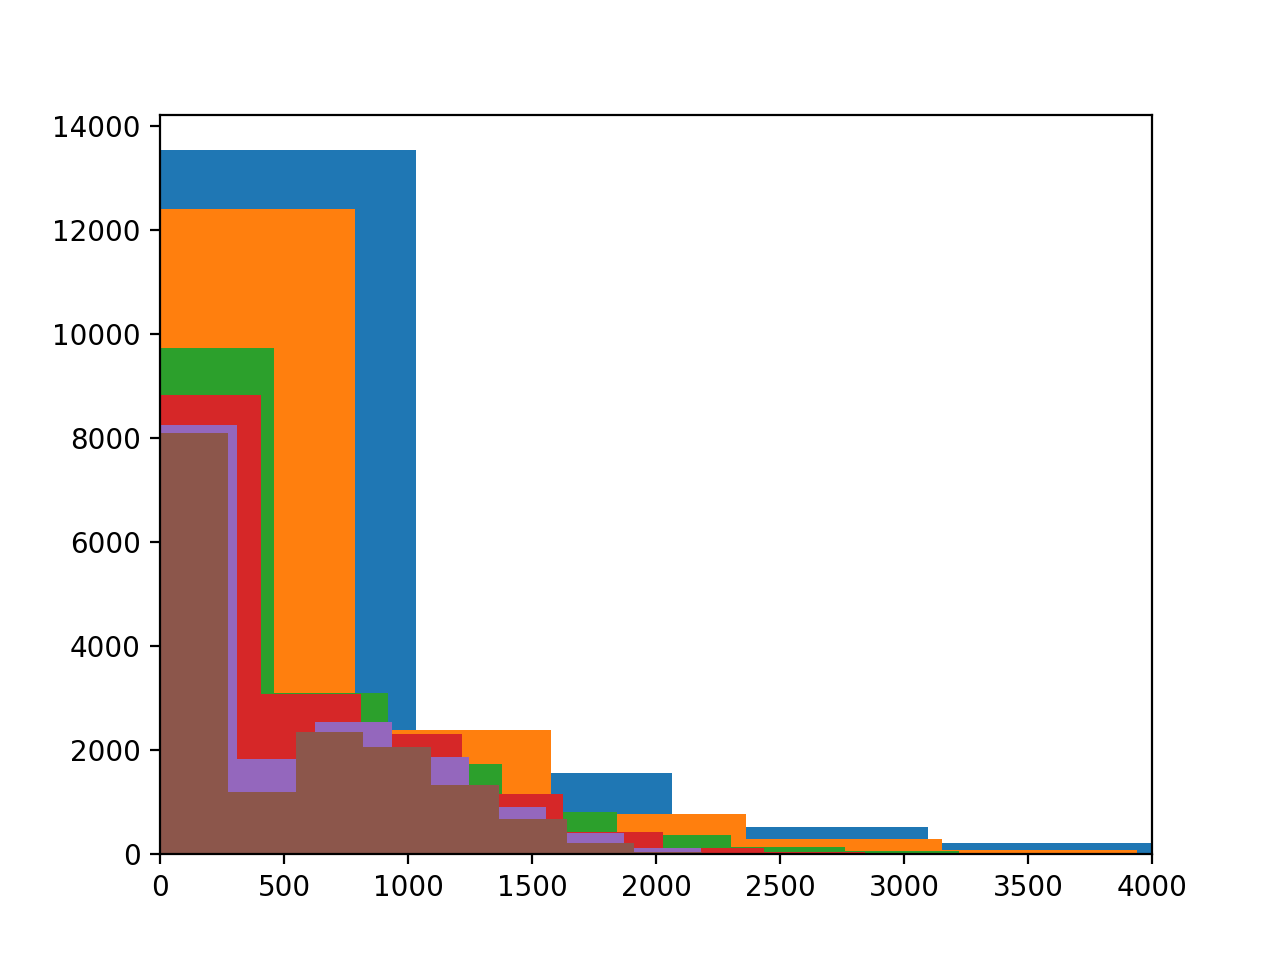

(0, 4000)

In [362]:
plt.figure()
for p in power_mean_200mV:
    plt.hist(p)
plt.xlim(0, 4000)

<IPython.core.display.Javascript object>


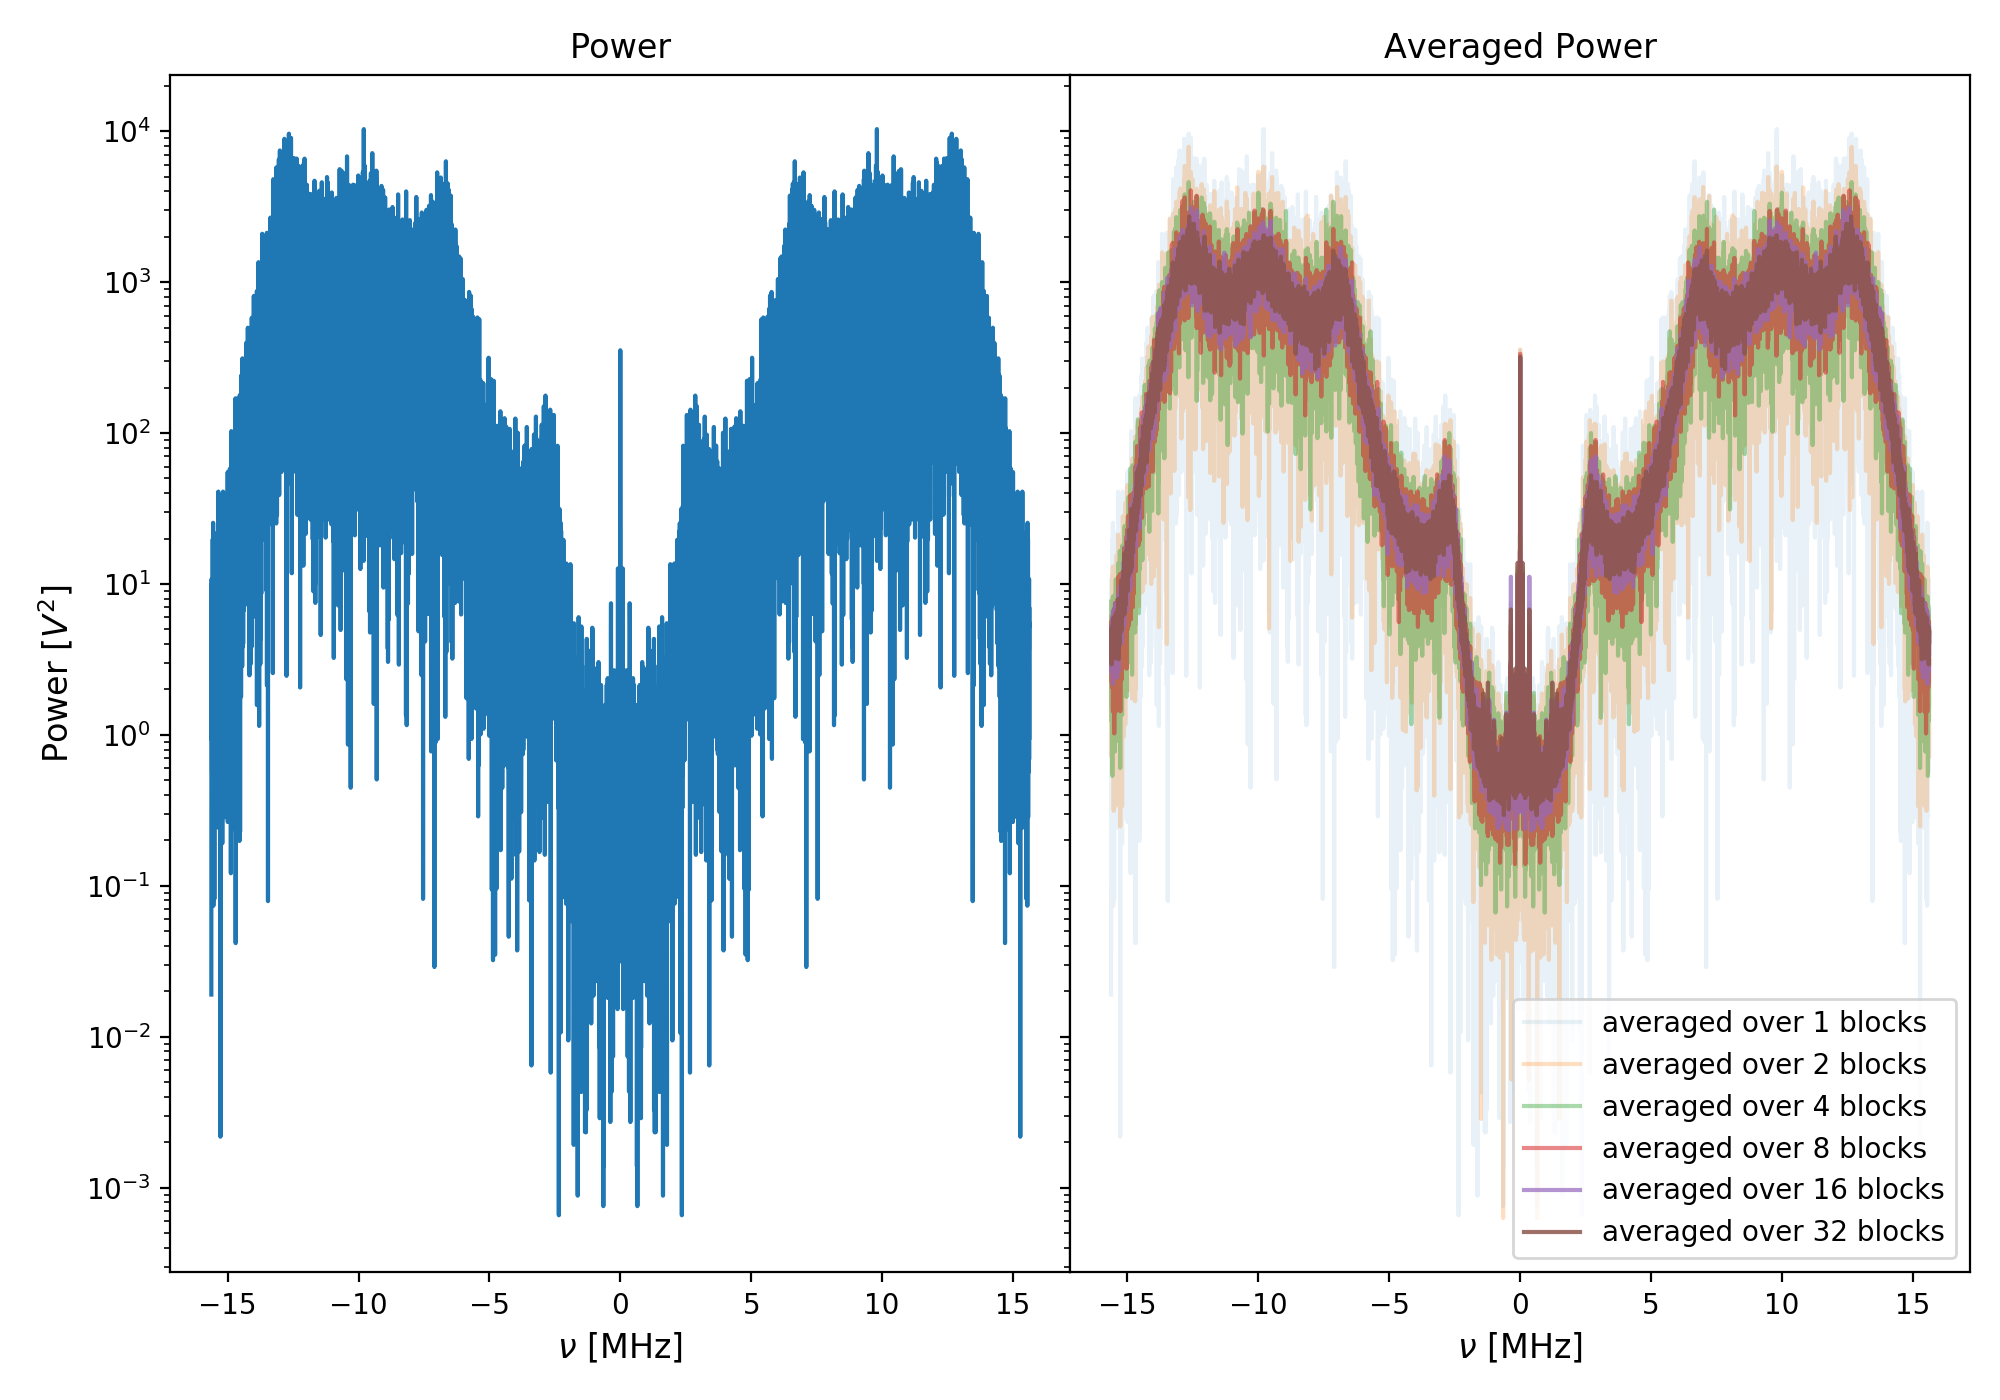

In [364]:
fig, axs = plt.subplots(ncols=2, sharey=True, gridspec_kw={'wspace':0}, figsize=(10,7))
axs[0].set_title('Power',fontsize='large')
# for p in power_200mV:
axs[0].semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_200mV[0]))
axs[0].set_xlabel(r'$\nu$ [MHz]',fontsize='large')

axs[1].set_title('Averaged Power',fontsize='large')
for p, i in zip(power_mean_200mV, np.arange(0,6)):
    axs[1].semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(p), alpha =.1+i*.15 , label='averaged over ' +str(2**i)+' blocks')
axs[1].legend(loc='lower right')
axs[1].set_xlabel(r'$\nu$ [MHz]',fontsize='large')
axs[0].set_ylabel('Power [$V^2$]',fontsize='large')
# for i in range(6):
# axs[1,0].plot(std)
plt.tight_layout()
plt.savefig('Noise_power.pdf')

* How does SNR depend on N? (Hint: SNR is proportional to Nx for some value of x.)

In [374]:
n_data_200 = [n_data[1][int(i*16000)+200:int(i*16000)+400] for i in range(32)]

In [375]:
def manual_correlate(dat_1, dat_2):
    return np.fft.ifft(np.fft.fft(dat_1)*np.conj(np.fft.fft(dat_2)))

def power_auto_correlate(dat_1):
    p = np.abs(np.fft.fft(dat_1))**2
    return np.fft.ifft(p)

In [376]:
ac = np.mean([manual_correlate(dat, dat) for dat in n_data_200], axis=0)
power_ac = np.mean([power_auto_correlate(dat) for dat in n_data_200], axis=0)
spac = np.mean([correlate(dat, dat, mode='same') for dat in n_data_200], axis=0)
npac = np.mean([np.correlate(dat, dat, mode='same') for dat in n_data_200], axis=0)

<ipython-input-376-8e3c36e0c596>:3: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  spac = np.mean([correlate(dat, dat, mode='same') for dat in n_data_200], axis=0)


In [377]:
times = np.linspace(0, 200 / (v_sample*1e6), 200)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

<IPython.core.display.Javascript object>


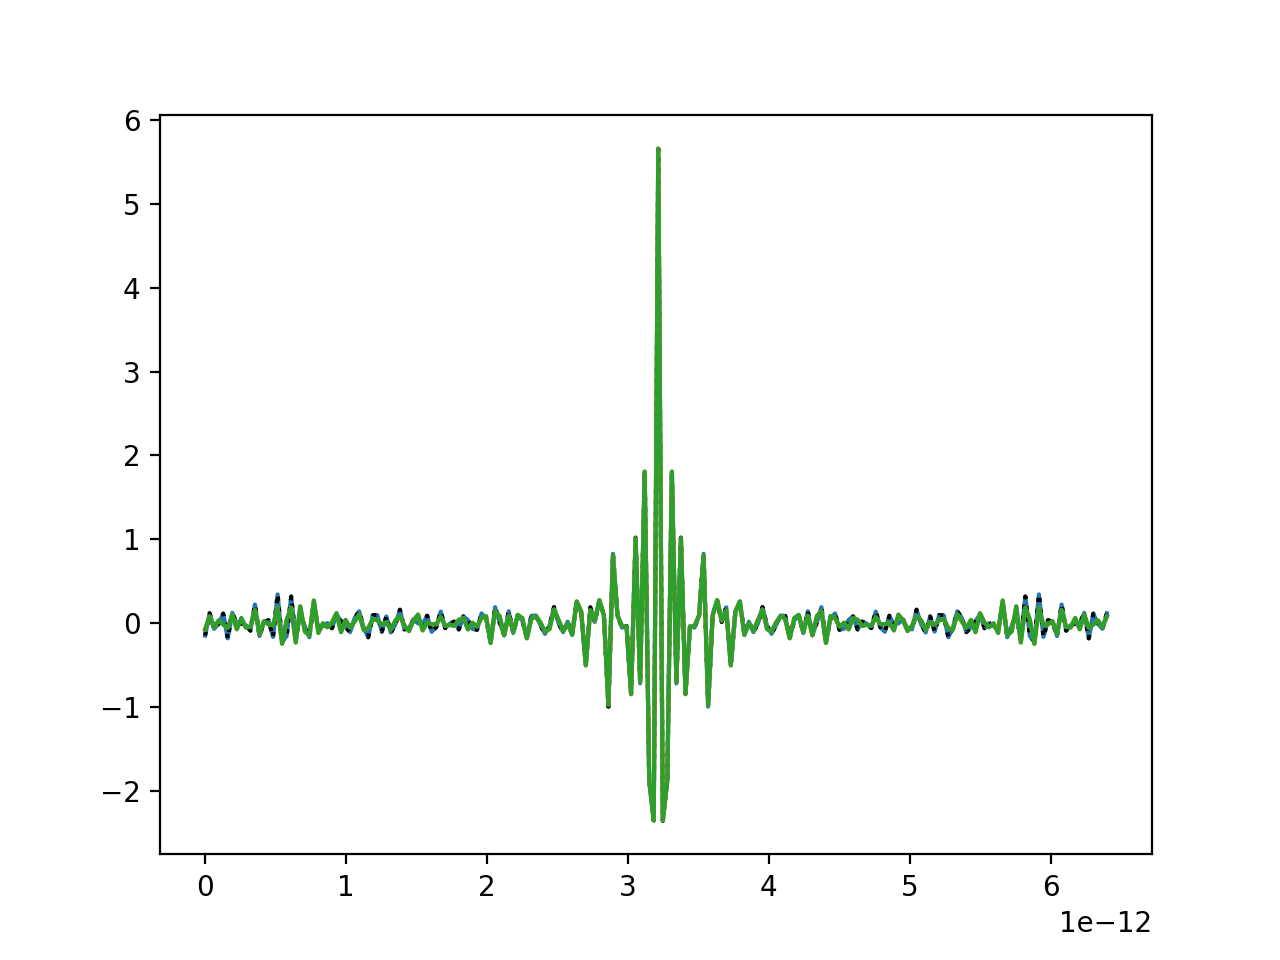

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [378]:
plt.figure()
plt.plot(times, np.fft.fftshift(ac))
plt.plot(times, np.fft.fftshift(power_ac), ':k')
plt.plot(times, spac)
plt.plot(times, npac)




* Are they identical?

# 7.1 DSB Mixer

In [379]:
v_sample = 61.5e6
v_lo = v_sample/4
delta_nu = .05*v_lo

In [380]:
v_rf = v_lo+np.array([delta_nu, -delta_nu])

In [381]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_DSB/'
files = sorted(glob.glob(path + '*'))
dsb_data = [np.load(file)['arr_0'][200:400] for file in files]

In [382]:
N=200
times = np.linspace(0, N / (v_sample), N)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

<IPython.core.display.Javascript object>


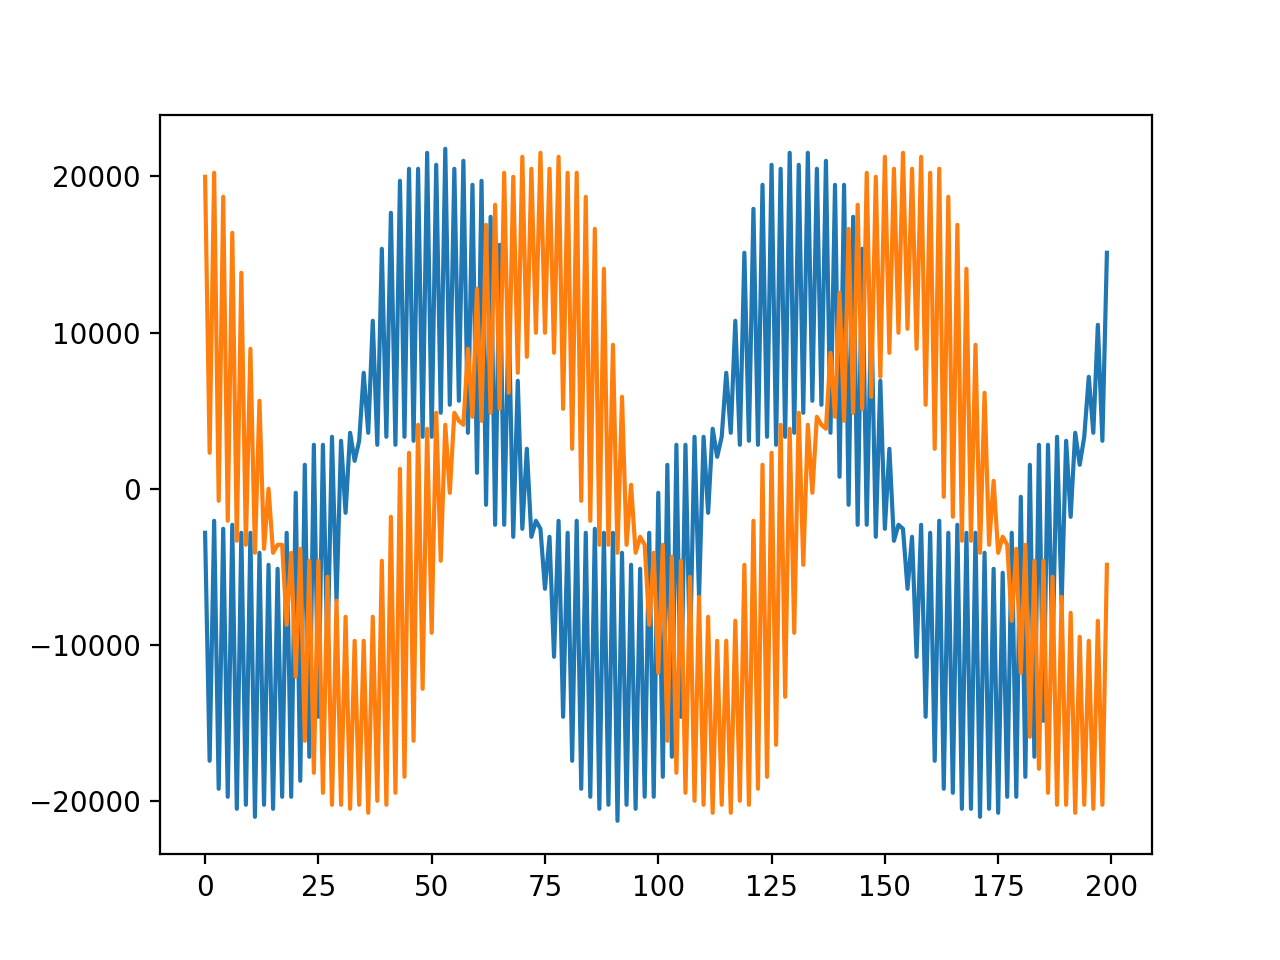

In [383]:
plt.figure()
plt.plot(dsb_data[0])
plt.plot(dsb_data[1])

In [384]:
power = [np.abs(np.fft.fft(dat))**2 for dat in dsb_data]

<IPython.core.display.Javascript object>


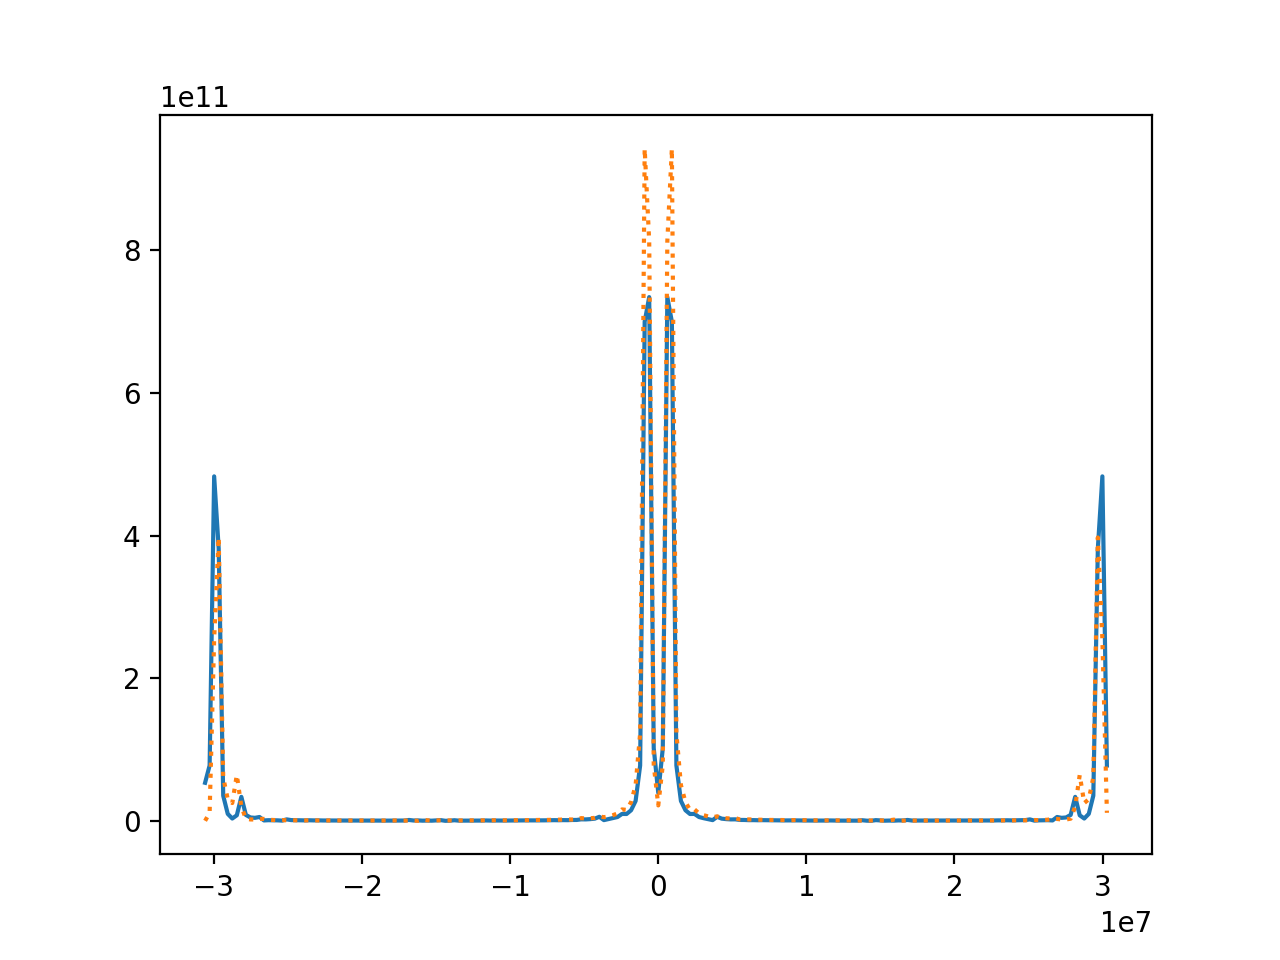

In [385]:
plt.figure()
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(power[0]))
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(power[1]), ':')
# plt.xlim(-12,12)

In [386]:
E = np.fft.fft(dsb_data[1])

<IPython.core.display.Javascript object>


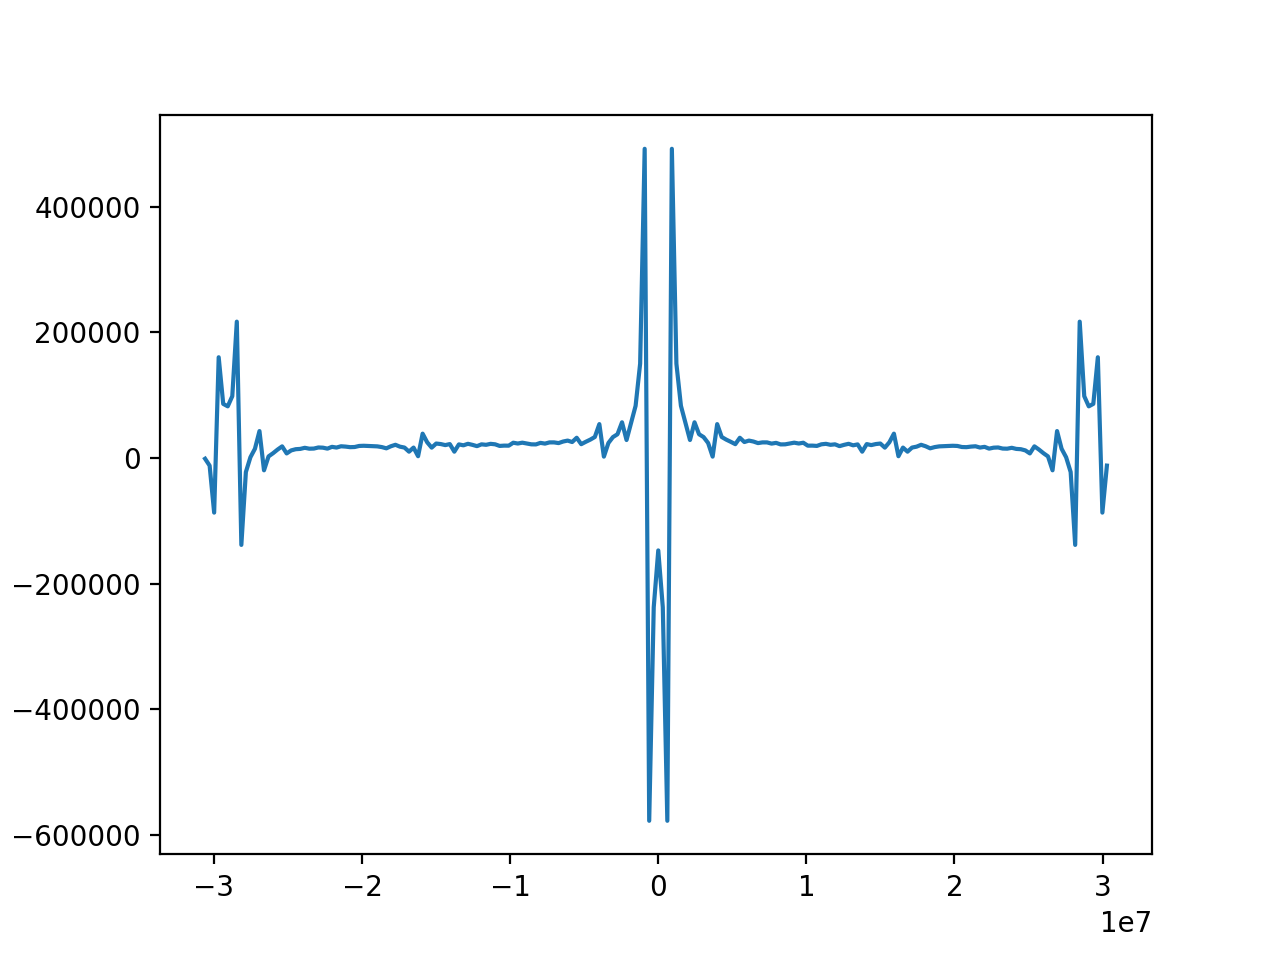

In [387]:
plt.figure()
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(E))

In [388]:
np.where(freqs< -16143750)
# np.where(freqs == 768751)

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147]),)

In [389]:
E[52:147] = 0 +0.j

<IPython.core.display.Javascript object>


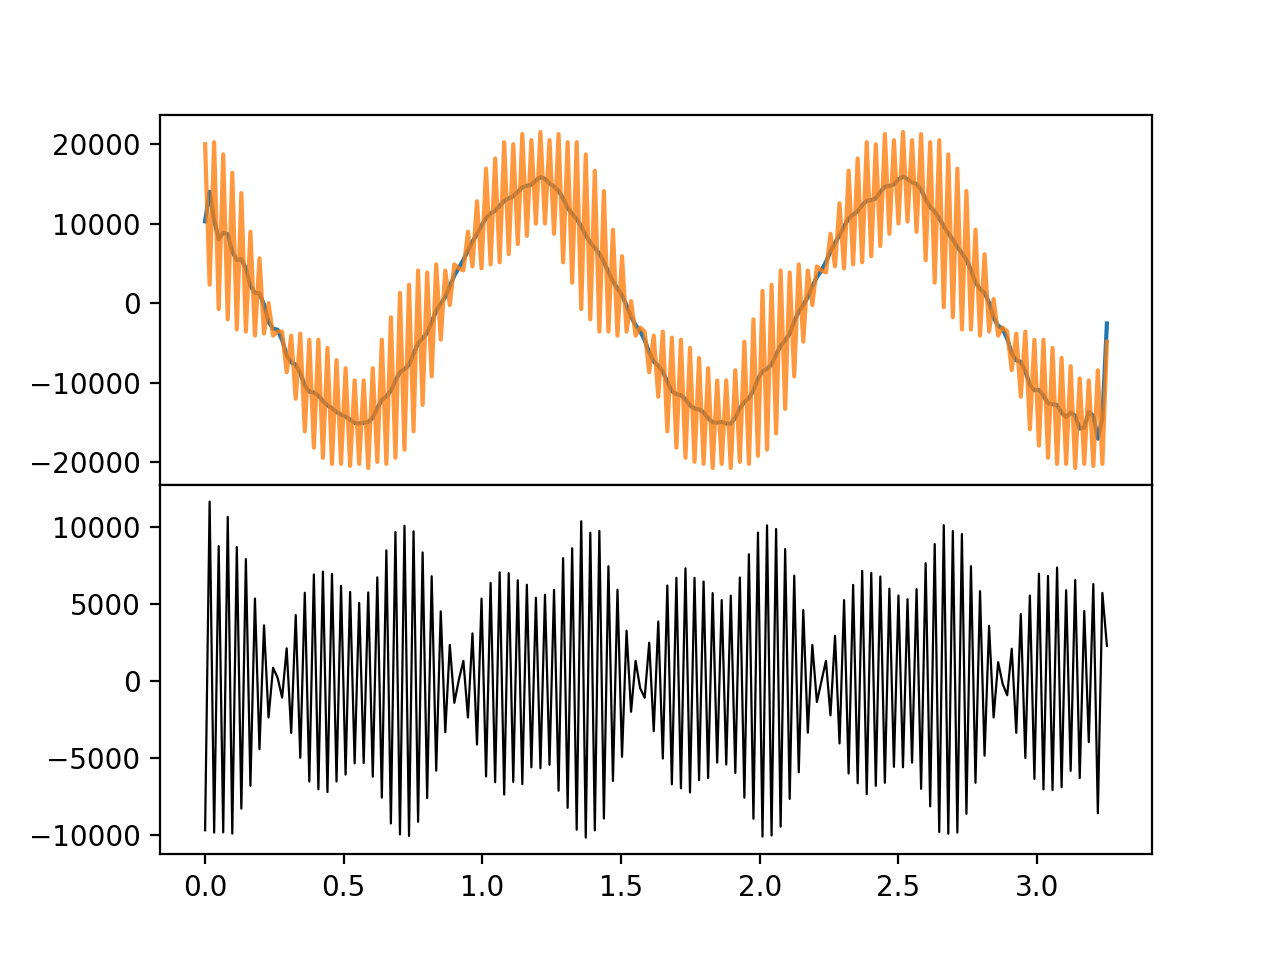

In [390]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0})
ax1.plot(times[:200]*1e6, np.fft.ifft(E)[:200])
ax1.plot(times[:200]*1e6, dsb_data[1][:200], alpha=.8)
ax2.plot(times[:200]*1e6, np.fft.ifft(E)[:200] - dsb_data[1][:200], 'k', lw=.8)


# 7.3.1

In [391]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB/'
files = sorted(glob.glob(path + '*'))
ssb_data = [np.load(file)['arr_0'][200:16000] for file in files]

N=15800
times = np.linspace(0, N / (v_sample), N)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))


In [392]:
power = [np.abs(np.fft.fft(dat))**2 for dat in ssb_data]

<IPython.core.display.Javascript object>


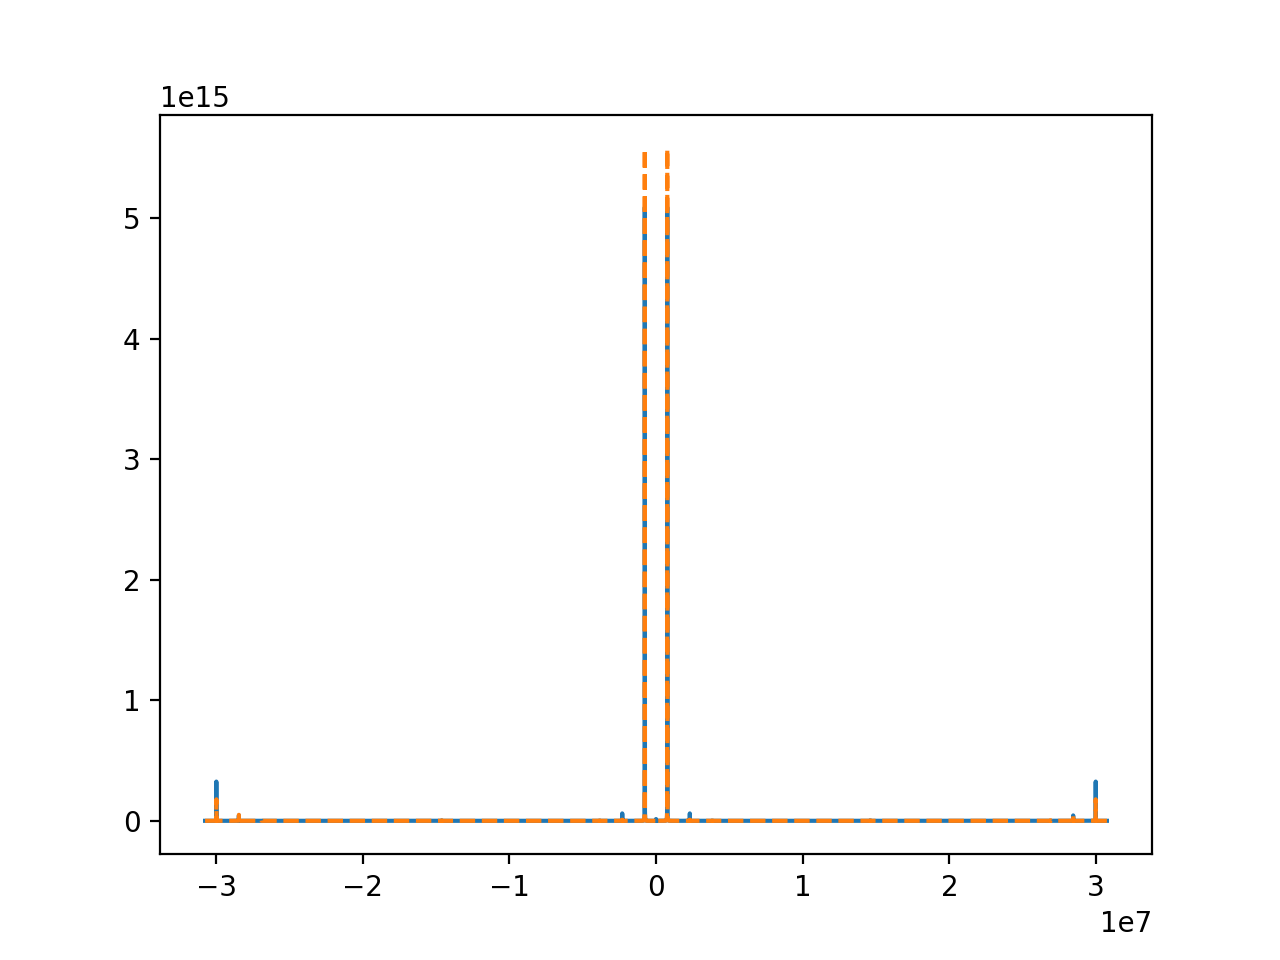

In [393]:
plt.figure()
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(power[0]))
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(power[1]), '--')

# 7.3.2

In [394]:
v_lo

15375000.0

<IPython.core.display.Javascript object>


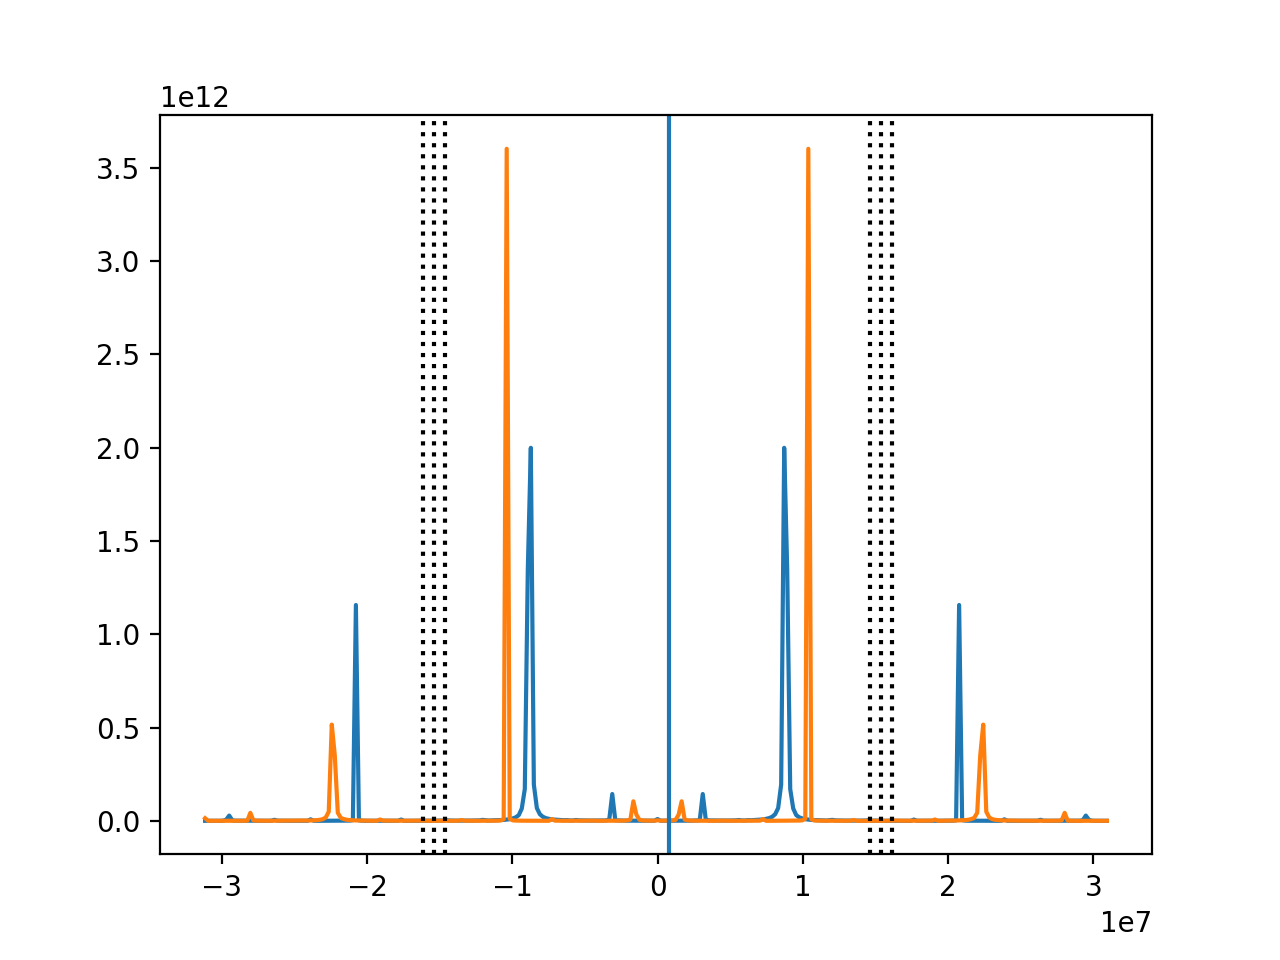

In [395]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/data/Lab_1_SSB90/'
files = sorted(glob.glob(path + '*'))
ssb_data = [np.load(file)['arr_0'][200:500] for file in files]
v_sample = 62.5e6
N=300
times = np.linspace(0, N / (v_sample), N)
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))
power = [np.abs(np.fft.fft(dat))**2 for dat in ssb_data]
plt.figure()
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(power[0]))
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(power[1]))
plt.axvline(v_lo, ls=':', c='black')
plt.axvline(-v_lo, ls=':', c='black')
for v in v_rf:
    plt.axvline(v, ls=':', c='k')
    plt.axvline(-v, ls=':', c='k')
plt.axvline(0.78125e6)

In [396]:
v_rf  = np.array([16.40625,
14.84375])

In [397]:
(freqs[258]- freqs[250])/1e6

1.66111111111111

In [398]:
delta_nu/1e6*2

1.5375